In [2]:

library(ggplot2)
library(vegan)
library(phyloseq)

otu <- as.matrix(read.table("camaron_wosingletons.tab", header=T, row.names=1)) #tabla de OTUs sin singletons, formato tabular.  eliminados con: http://qiime.org/scripts/filter_otus_from_otu_table.html
OTU = otu_table(otu, taxa_are_rows=T)
taximat = as.matrix(read.table("camaron_wosingletons.tax", header=T, row.names=1)) #revisar los encabezados
taxi=tax_table(taximat)
camaron = phyloseq(OTU, taxi)
data= read.table("metadata2.txt", header=T, row.names=1) #los metadatos deben de estar en el mismo orden en el que estan en la tabla de OTUs:  sample_data(camaron)
sampledata = sample_data(data.frame(id=data$sampleID, estado=data$Estado, health=data$health, year=data$year, health=data$health, temperature=data$temperature, pH=data$pH, oxygen=data$oxygen, salinity=data$salinity, chlorophyll=data$chlorophyll, latitude=data$latitude, longitude=data$longitude, row.names=sample_names(camaron)))
camaron = phyloseq(OTU, taxi, sampledata)

wh0 = genefilter_sample(camaron, filterfun_sample(function(x) x >=2 ), A=0.01*nsamples(camaron))
camaron2 = prune_taxa(wh0,camaron)

Loading required package: permute
Loading required package: lattice
This is vegan 2.5-2


       id          estado       health       year       health.1  
 nay141 :  4   Nayarit:152   light :164   y2014:592   light :164  
 nay1410:  4   Sinaloa:312   mild  :184   y2015:160   mild  :184  
 nay1411:  4   Sonora :272   none  :376               none  :376  
 nay1412:  4   Yucatán: 16   severe: 28               severe: 28  
 nay1413:  4                                                      
 nay1414:  4                                                      
 (Other):728                                                      
  temperature          pH            oxygen         salinity    
 Min.   :14.37   Min.   :7.000   Min.   :2.490   Min.   : 0.86  
 1st Qu.:22.68   1st Qu.:7.850   1st Qu.:5.095   1st Qu.:38.25  
 Median :30.49   Median :8.100   Median :5.860   Median :43.60  
 Mean   :28.18   Mean   :8.061   Mean   :5.744   Mean   :41.81  
 3rd Qu.:32.05   3rd Qu.:8.352   3rd Qu.:6.753   3rd Qu.:50.13  
 Max.   :34.11   Max.   :8.730   Max.   :8.620   Max.   :61.03  
 NA's   :

Warning message:
“Removed 564 rows containing missing values (geom_errorbar).”

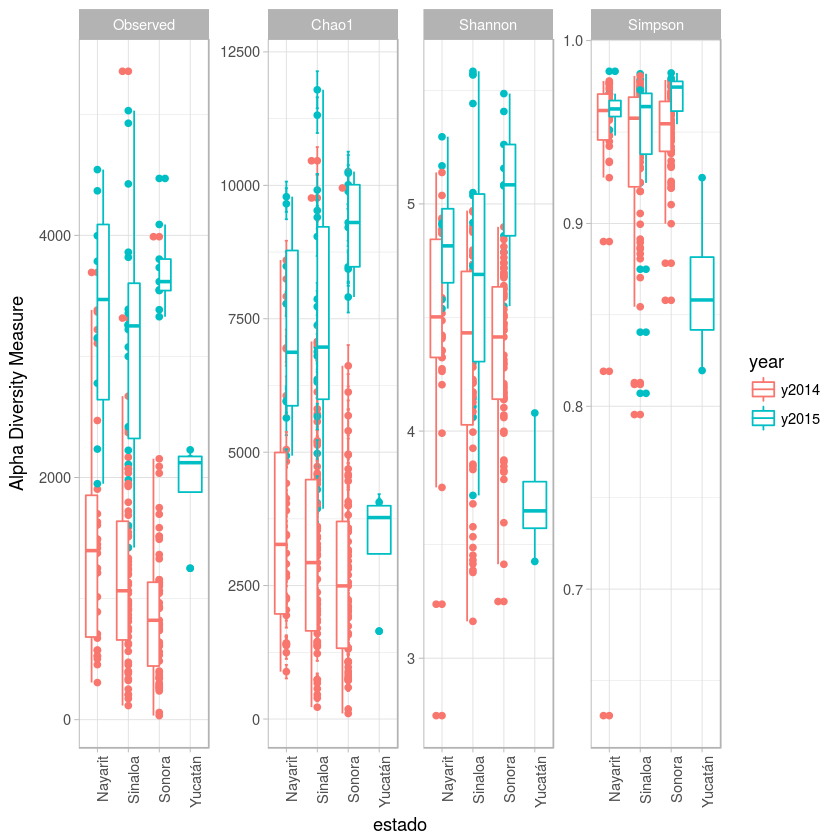

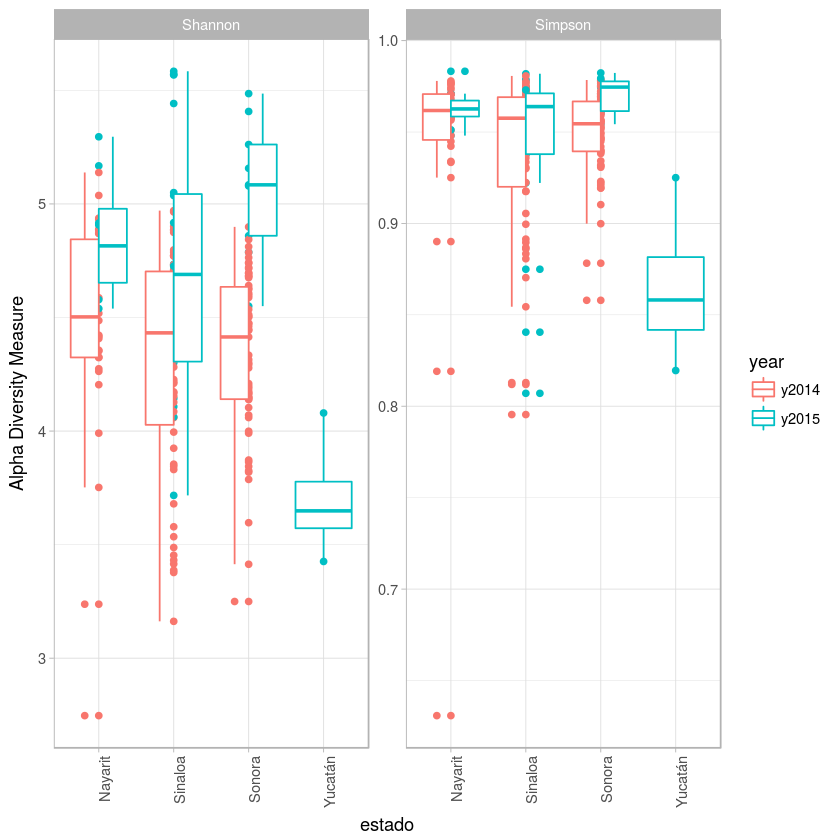

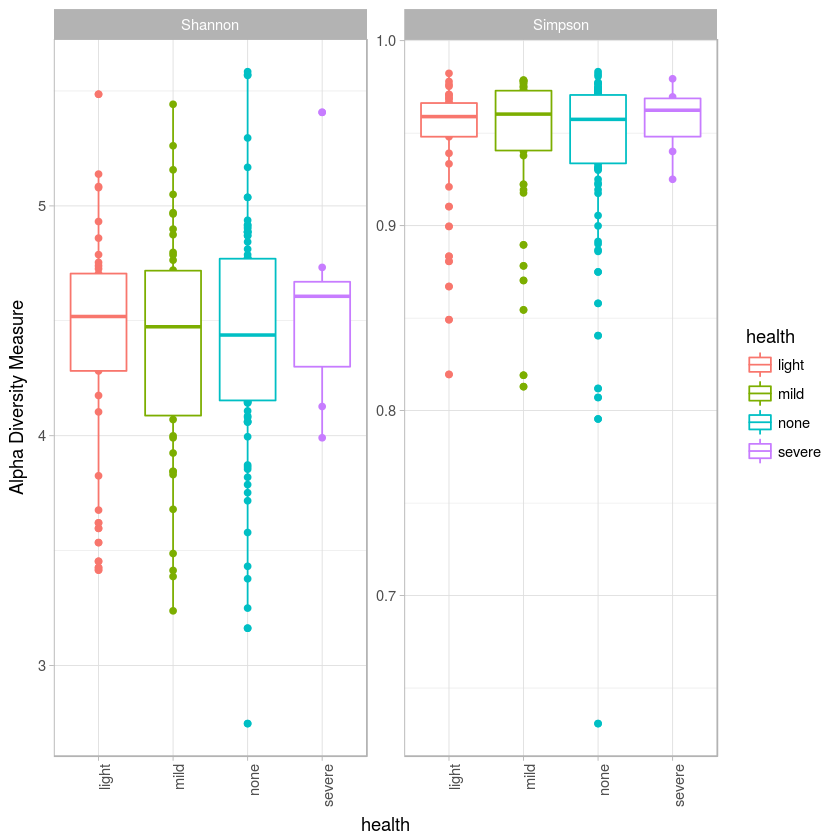

In [6]:
p <- plot_richness(camaron, x="estado", color="year", measures=c("Observed", "Chao1", "Shannon", "Simpson")) + geom_boxplot()+theme_light() + theme(axis.text.x=element_text(angle=90, hjust=1))
#p$data
a <-p$data
summary(a)
p

p <- plot_richness(camaron, x="estado", color="year", measures=c("Shannon", "Simpson")) + geom_boxplot()+theme_light() + theme(axis.text.x=element_text(angle=90, hjust=1))
#p$data

p

camaron_lightseveresig = subset_samples(camaron, health != c("NA"))
p <- plot_richness(camaron_lightseveresig, x="health", color="health", measures=c("Shannon", "Simpson")) + geom_boxplot()+theme_light() + theme(axis.text.x=element_text(angle=90, hjust=1))
p


Observed Chao1    Shannon  Simpson  
1 1376     4135.167 4.587125 0.9572683
2 1904     6059.465 4.869905 0.9707781
3 1490     3436.705 4.422153 0.9334090
4 3367     8244.784 4.932102 0.9762140
5  455     1377.660 4.731828 0.9771073
6 3384     4826.286 3.990993 0.9250512

    Observed        Chao1            Shannon         Simpson      
 Min.   :  34   Min.   :  104.2   Min.   :2.747   Min.   :0.6308  
 1st Qu.: 703   1st Qu.: 1928.6   1st Qu.:4.150   1st Qu.:0.9371  
 Median :1227   Median : 3447.9   Median :4.481   Median :0.9580  
 Mean   :1609   Mean   : 4061.2   Mean   :4.425   Mean   :0.9437  
 3rd Qu.:2155   3rd Qu.: 5672.8   3rd Qu.:4.738   3rd Qu.:0.9697  
 Max.   :5355   Max.   :11790.9   Max.   :5.584   Max.   :0.9832  

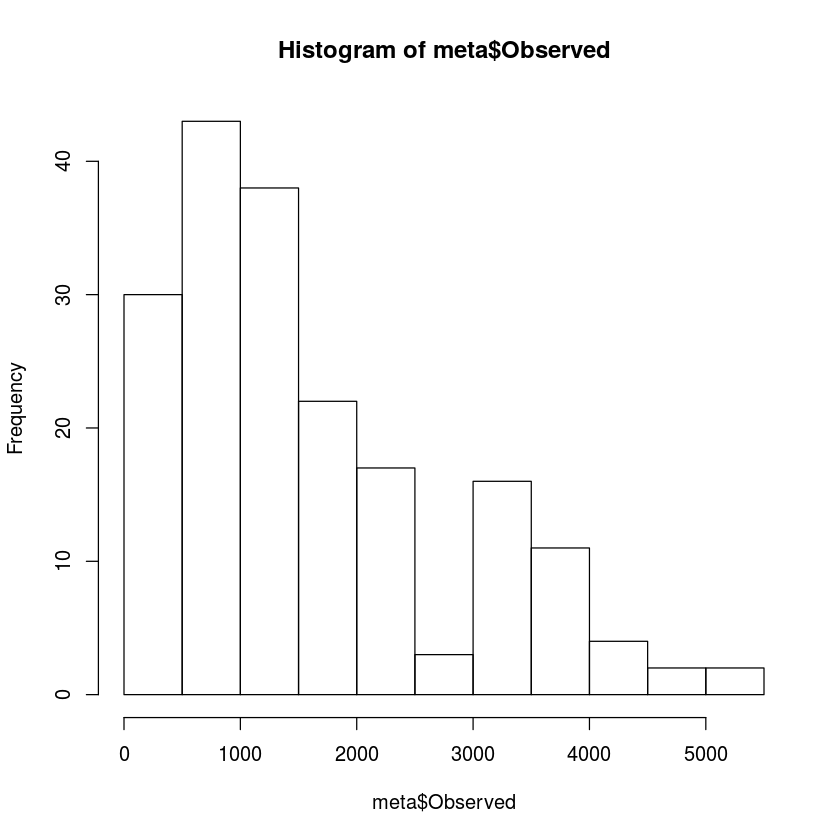

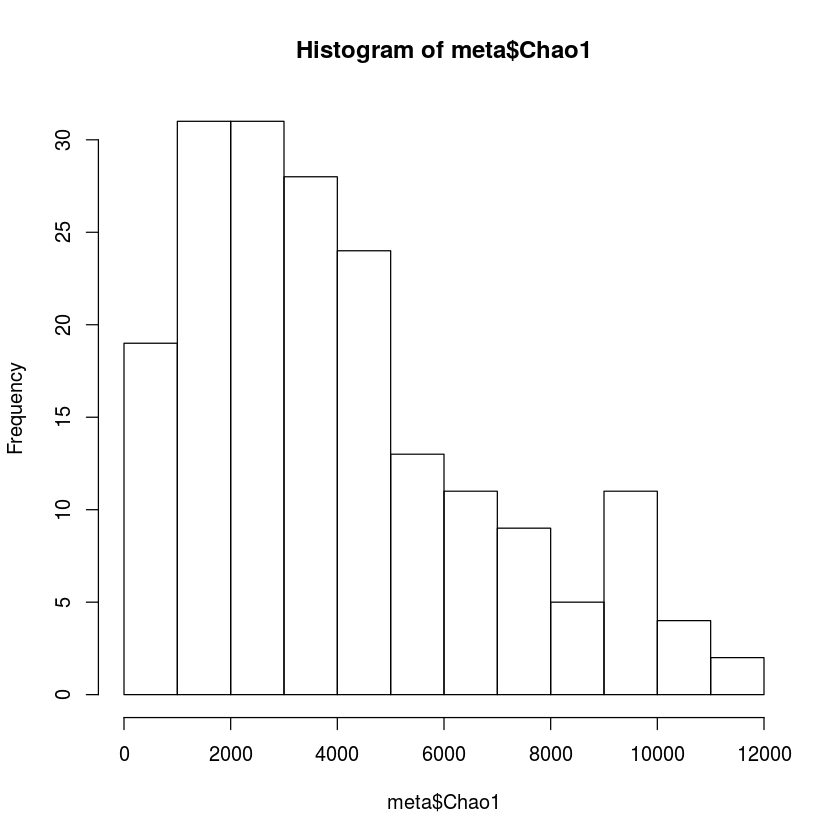

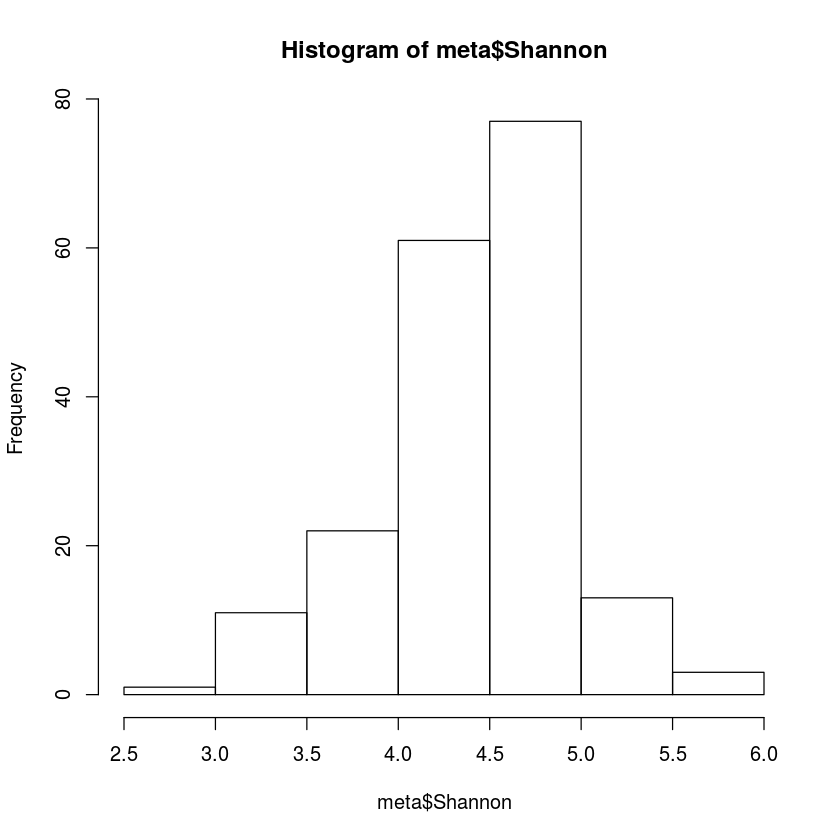

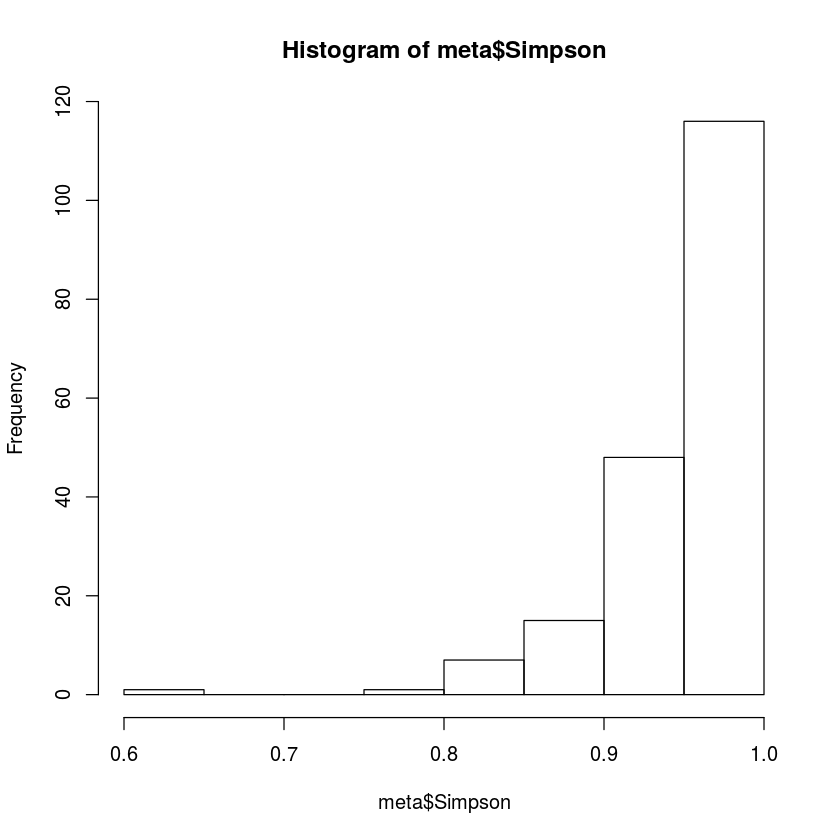

In [10]:
#write.table(a, "data.csv")
meta <- read.table("data.csv",sep="\t",header=T,row.names = 1) #data.csv se hizo a partir de la tabla anterior para calcular
#los datos de diversidad alfa
head(meta)
summary(meta)

hist(meta$Observed, breaks=10)
hist(meta$Chao1, breaks=10)
hist(meta$Shannon, breaks=10)
hist(meta$Simpson, breaks=10)



             Df Sum Sq Mean Sq F value  Pr(>F)    
year          1   4.30   4.304   18.87 2.3e-05 ***
Residuals   186  42.43   0.228                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Shannon ~ year, data = meta)

$year
                 diff       lwr      upr   p adj
y2015-y2014 0.3697091 0.2018061 0.537612 2.3e-05


             Df    Sum Sq   Mean Sq F value Pr(>F)    
year          1 127462512 127462512     164 <2e-16 ***
Residuals   186 144584710    777337                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Observed ~ year, data = meta)

$year
                diff      lwr      upr p adj
y2015-y2014 2011.914 1701.953 2321.874     0


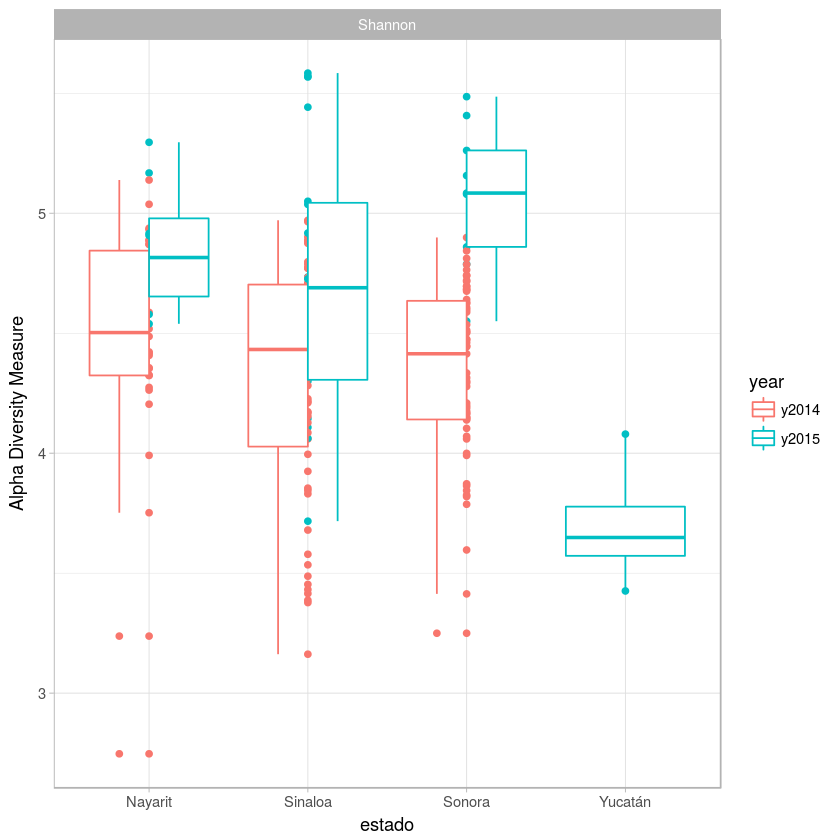

In [23]:
aov.shannon.year = aov(Shannon~year, data=meta)
summary(aov.shannon.year)
TukeyHSD(aov.shannon.year)

aov.shannon.year = aov(Observed~year, data=meta)
summary(aov.shannon.year)
TukeyHSD(aov.shannon.year)

p <- plot_richness(camaron, x="estado", color="year", measures=c("Shannon")) + geom_boxplot()+theme_light()
p

In [5]:
aov.shannon.estado = aov(Shannon~estado, data=meta)
summary(aov.shannon.estado)
TukeyHSD(aov.shannon.estado)

             Df Sum Sq Mean Sq F value Pr(>F)  
estado        3   2.70  0.8997    3.76 0.0119 *
Residuals   184  44.03  0.2393                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Shannon ~ estado, data = meta)

$estado
                       diff        lwr         upr     p adj
Sinaloa-Nayarit -0.14586596 -0.3967678  0.10503589 0.4352127
Sonora-Nayarit  -0.11424284 -0.3711171  0.14263146 0.6571323
Yucatán-Nayarit -0.84414610 -1.5108252 -0.17746704 0.0066923
Sonora-Sinaloa   0.03162312 -0.1787977  0.24204390 0.9798585
Yucatán-Sinaloa -0.69828015 -1.3484751 -0.04808519 0.0299391
Yucatán-Sonora  -0.72990326 -1.3824262 -0.07738036 0.0215890


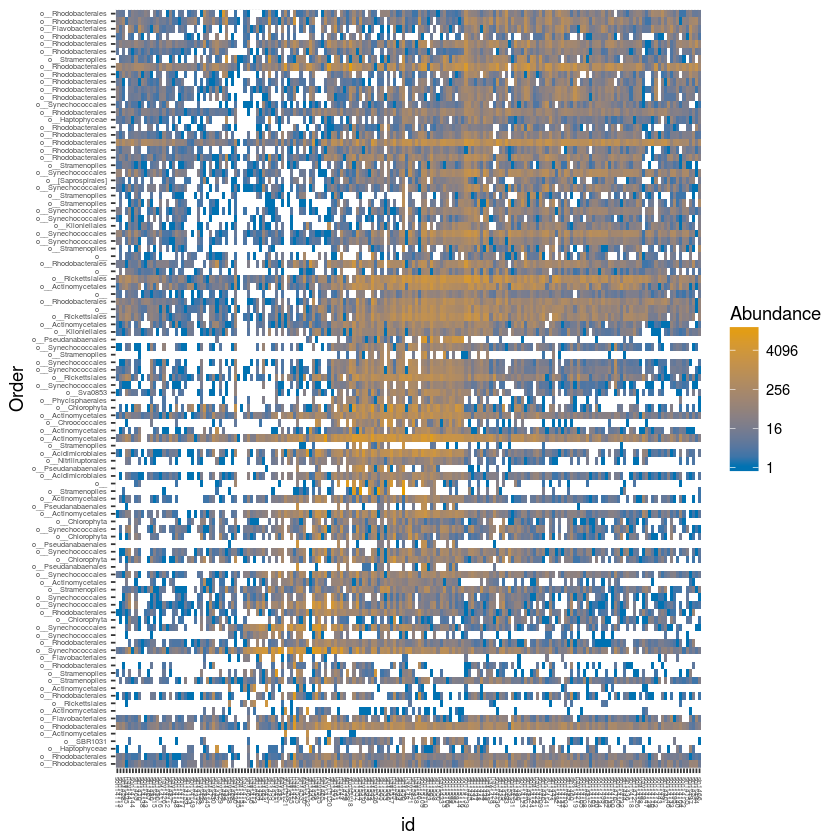

In [15]:
gpt <- camaron
gpt <- prune_taxa(names(sort(taxa_sums(camaron),TRUE)[1:100]),gpt) #aquí se puede filtrar para los 100 màs abundantes o los que quieran. 
plot_heatmap(gpt,"MDS", "bray", "id", "Order", low="#0072B2", high="#E69F00",na.value="white")
#ggsave ("heatmap100.pdf", width=60, height=60, units="cm")

[1] 4324

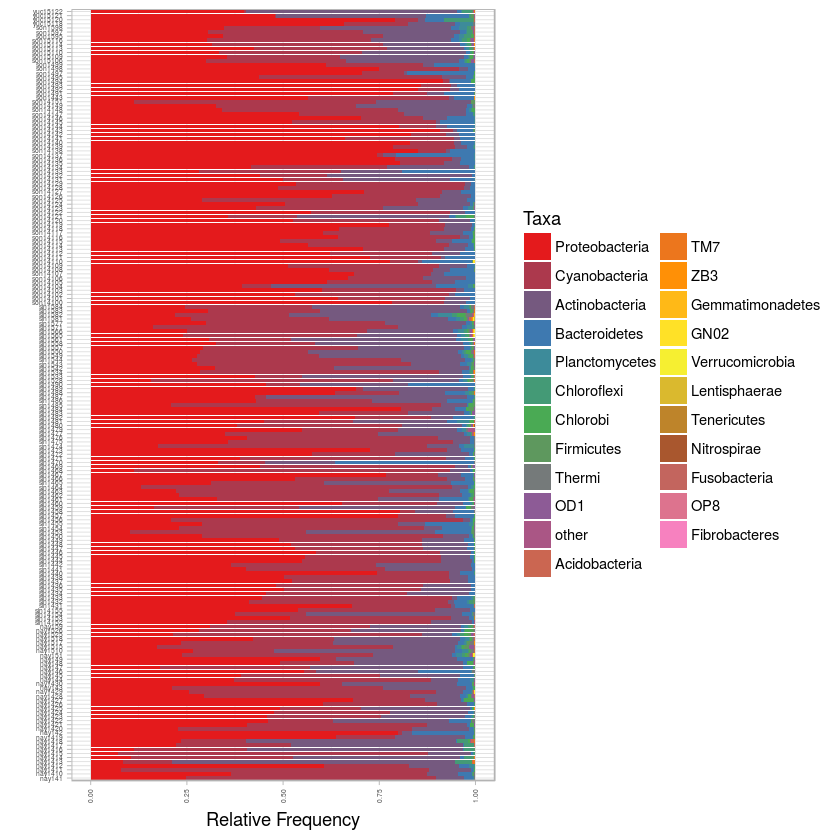

In [17]:
library(RColorBrewer)

phylum <- read.table("phyla.txt", header=T, row.names=1)
abund_table <- t(phylum)
x <- abund_table[,order(colSums(abund_table), decreasing=T)]

for (i in 1:dim(x)[2]){
tmp <- data.frame(row.names=NULL,Sample=rownames(x),Taxa=rep(colnames(x)[i],dim(x)[1]),Value=x[,i]) 
       if(i==1){df<-tmp} else {df<-rbind(df,tmp)}
}

df$Taxa <- factor(df$Taxa, levels=rev(levels(df$Taxa)))

df$V1 <- factor(df$Sample, levels=(unique(rownames(x))))
N <- length(df$Taxa)
N
#colours <- c("darkorange1", "snow3", "green3", "navy", "greenyellow", "purple", "turquoise4", "skyblue", "violetred", "yellow", "red", "purple4", "turquoise1", "violet", "slateblue4", "olivedrab", "tomato4", "aquamarine")
#Con la siguiente parte se controla el orden de impresión del histograma
df$orden <- factor(df$Sample, levels = c("son14125", "son14151", "nay1413", "nay1417", "nay1418", "nay1414", "nay1416", "sin1485", "nay147", "nay143", "sin1557", "nay1515", "nay159", "sin1456", "sin1474", "nay1415", "sin1461", "nay1525", "nay141", "sin1462", "sin1464", "sin1453", "sin1454", "sin1455", "nay1411", "sin1463", "sin1459", "sin1465", "sin14152", "sin14153", "son14114", "son14117", "son14115", "son14148", "nay1428", "nay1429", "sin1468", "sin1471", "son14145", "sin1431", "son14112", "son14116", "son14111", "son14138", "son14144", "son14143", "nay1412", "sin1467", "sin14154", "son14149", "son14133", "sin1470", "sin1457", "son14122", "sin14155", "son1495", "sin1466", "sin1469", "son14113", "nay1430", "sin1487", "nay1426", "sin1480", "sin1458", "sin1490", "yuc15122", "yuc15121", "sin1442", "sin1441", "sin1479", "sin1488", "son1494", "son1497", "son14146", "son14140", "son14142", "son14135", "nay142", "yuc15118", "yuc15120", "sin1489", "sin1432", "sin1433", "nay148", "nay1526", "sin1533", "nay145", "nay146", "sin1561", "son15109", "son15110", "son15113", "nay1421", "nay1423", "nay1510", "nay1517", "sin1542", "nay1518", "sin1583", "sin1582", "son15114", "son1597", "son15116", "son1595", "sin1581", "sin1565", "sin1566", "sin1549", "sin1550", "sin1558", "son15106", "son1598", "sin1450", "sin1577", "sin1544", "sin1571", "sin1543", "nay151", "sin1528", "nay1420", "sin1477", "sin1584", "nay1424", "nay149", "nay1425", "son14104", "sin1434", "sin1435", "sin1486", "son14131", "son14123", "son14121", "son14132", "sin1481", "son14134", "son14108", "son1498", "son14102", "son14120", "son14101", "son14105", "son14106", "son14100", "son14126", "son14147", "sin1472", "sin1436", "sin1444", "son14118", "sin1475", "nay1410", "nay144", "nay1422", "nay1427", "sin1460", "sin1476", "sin1445", "sin1437", "sin1438", "son1492", "sin1448", "sin1449", "sin1446", "sin1447", "son14139", "son1493", "son14136", "son14119", "sin1483", "sin1484", "son14141", "son14137", "nay1419", "sin1473", "sin1482", "son14109", "son14124", "son14107", "son14127", "sin1534", "son1491", "son14110", "son14103", "son14128", "son1499", "sin1440", "son1443", "son14129"))
#para graficar sin que importe el orden:    p <- ggplot (df, aes(Sample, Value, fill=Taxa)) + geom_bar(stat="identity")
#si te importa el orden:
#p <- ggplot (df, aes(x=df$orden, Value, fill=Taxa)) + geom_bar(stat="identity")
p <- ggplot (df, aes(Sample, Value, fill=Taxa)) + geom_bar(stat="identity")
p2 <- p + scale_fill_manual(values=rev(colorRampPalette(brewer.pal(8, "Set1"))(23))) #la última parte, el 12 es definido por la paleta, 23 es el número de categorías (phyla a colorear) pueden poner menos y les va a salir una advertencia de que necesitan definir un mínimo. 
p2 <- p2 +theme_light() +theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5))  
p2 <- p2 + xlab("") +  theme(axis.text=element_text(size=4)) + ylab("Relative Frequency") + guides(fill = guide_legend(reverse=TRUE))
p2 + coord_flip() 
ggsave("barplot_april18.pdf", width = 21.5, height = 27.94, units = "cm")


## https://github.com/joey711/phyloseq/issues/547


physeq.subset <- subset_taxa(physeq, rownames(tax_table(physeq)) %in% c("Otu00001", "Otu00002"))

Alternatively, I always like to add my OTUs as their own column in the tax_table which i do this way:

tax_table(physeq) <- cbind(tax_table(physeq), 
    rownames(tax_table(physeq)))

colnames(tax_table(physeq)) <- 
  c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "OTUID")



DPCoA 
"dpcoa"

designdist 
     "ANY"

$UniFrac
[1] "unifrac"  "wunifrac"

$DPCoA
[1] "dpcoa"

$JSD
[1] "jsd"

$vegdist
 [1] "manhattan"  "euclidean"  "canberra"   "bray"       "kulczynski"
 [6] "jaccard"    "gower"      "altGower"   "morisita"   "horn"      
[11] "mountford"  "raup"       "binomial"   "chao"       "cao"       

$betadiver
 [1] "w"   "-1"  "c"   "wb"  "r"   "I"   "e"   "t"   "me"  "j"   "sor" "m"  
[13] "-2"  "co"  "cc"  "g"   "-3"  "l"   "19"  "hk"  "rlb" "sim" "gl"  "z"  

$dist
[1] "maximum"   "binary"    "minkowski"

$designdist
[1] "ANY"

Run 0 stress 0.1911133 
Run 1 stress 0.2009391 
Run 2 stress 0.1895394 
... New best solution
... Procrustes: rmse 0.05008699  max resid 0.2094755 
Run 3 stress 0.1998793 
Run 4 stress 0.2014362 
Run 5 stress 0.1977157 
Run 6 stress 0.1822522 
... New best solution
... Procrustes: rmse 0.04111274  max resid 0.2947137 
Run 7 stress 0.1819859 
... New best solution
... Procrustes: rmse 0.02293172  max resid 0.3061621 
Run 8 stress 0.1782109 
... New best solution
... Pr

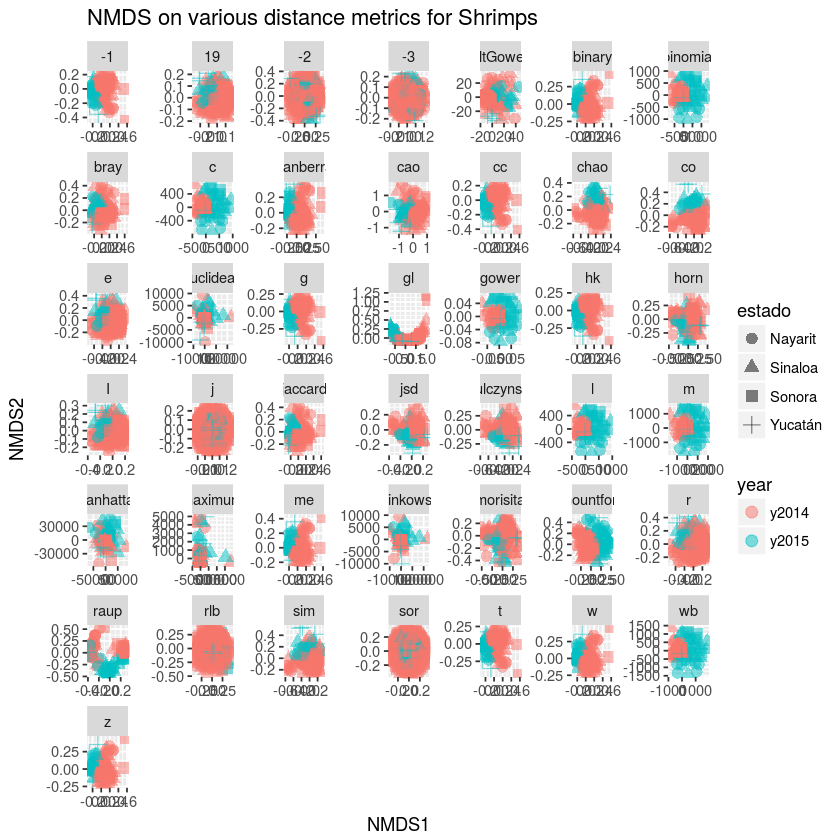

In [32]:
library(ape)
library(plyr)
dist_methods <- unlist(distanceMethodList)


wh0 = genefilter_sample(camaron, filterfun_sample(function(x) x >=2 ), A=0.01*nsamples(camaron))
camaron2 = prune_taxa(wh0,camaron)
#Remove the two distance-methods that require a tree, and the generic custom method that requires user-defined distance arguments.
# These require tree
#dist_methods[(1:3)]
dist_methods[(3)]
# Remove them from the vector
#dist_methods <- dist_methods[-(1:3)]
dist_methods <- dist_methods[-(1:3)]
# This is the user-defined method:
dist_methods["designdist"]
# Remove the user-defined distance
dist_methods = dist_methods[-which(dist_methods=="ANY")]

#NMDS



plist <- vector("list", length(dist_methods))
print(distanceMethodList)

for( i in dist_methods ){
 # Calculate distance matrix
    iDist <- distance(camaron2, method=i)
    # Calculate ordination
    iMDS  <- ordinate(camaron2, "NMDS", distance=iDist, na.rm=TRUE)
    ## Make plot
    p <- NULL
    # Don't carry over previous plot (if error, p will be blank)
    # Create plot, store as temp variable, p
    p <- plot_ordination(camaron, iMDS, color="habitat", shape="species")
    p <- p + ggtitle(paste("NMDS using distance method ", i, sep=""))
    plist[[i]] = p
}

df = ldply(plist, function(x) x$data)
names(df)[1] <- "distance"
    #aqui es importante fijarse como se llaman los ejes de las distintas metricas para graficar correctamente (DCA, NMDS, Axis.1, etc) puedes verlo con head(df) para ver los ejes

 p = ggplot(df, aes(NMDS1, NMDS2, color=year, shape=estado))
 p = p + geom_point(size=3, alpha=0.5)
 p = p + facet_wrap(~distance, scales="free")
 p = p + ggtitle("NMDS on various distance metrics for Shrimps")
 p


In [33]:
ggsave("NMDS_allmetrics_april18.pdf", width = 27.94, height = 21.5, units = "cm")

In [12]:
source("read.newick.R")
tree <- read.newick("camarones.tre")
tree <- collapse.singles(tree)
camaron = phyloseq (OTU, sampledata, phy_tree(tree))
camaron
wh0 = genefilter_sample(camaron, filterfun_sample(function(x) x >=2 ), A=0.01*nsamples(camaron))
camaron2 = prune_taxa(wh0,camaron)
camaron2

ERROR: Error in collapse.singles(tree): could not find function "collapse.singles"


Call: capscale(formula = distance ~ year + estado, data = data)

              Inertia Proportion Rank
Total         49.9549     1.0000     
Constrained    8.0321     0.1608    4
Unconstrained 41.9228     0.8392  183
Inertia is squared Unknown distance 

Eigenvalues for constrained axes:
 CAP1  CAP2  CAP3  CAP4 
5.767 1.226 0.600 0.439 

Eigenvalues for unconstrained axes:
 MDS1  MDS2  MDS3  MDS4  MDS5  MDS6  MDS7  MDS8 
3.824 1.788 1.238 1.207 1.140 0.920 0.712 0.648 
(Showed only 8 of all 183 unconstrained eigenvalues)


Df  SumOfSqs  F        Pr(>F)
Model      4  8.032101 8.765361 1e-04 
Residual 183 41.922817       NA    NA

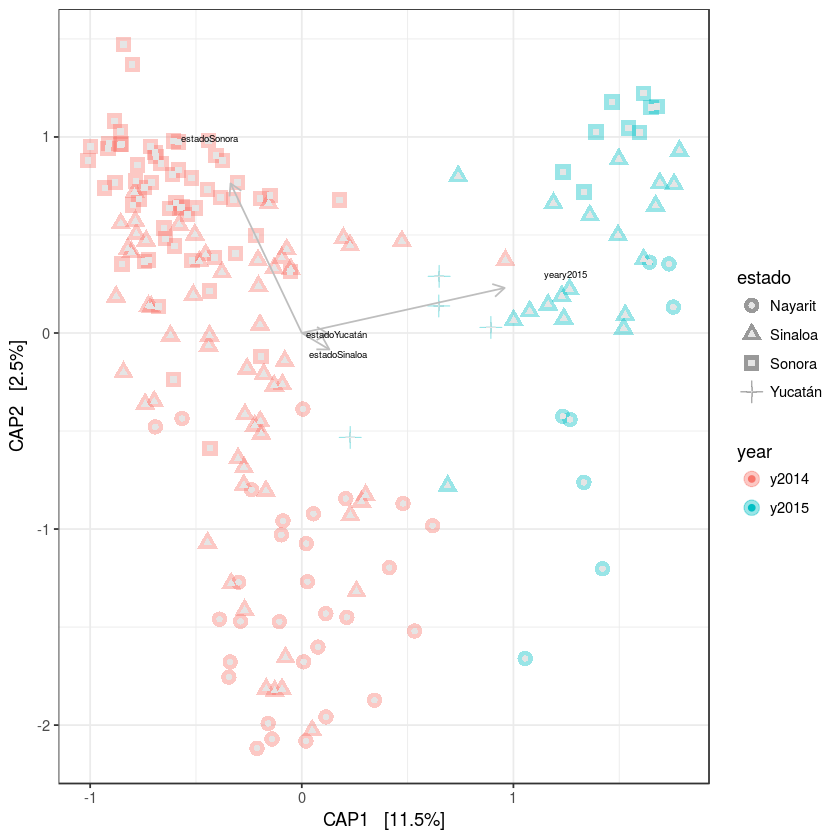

In [42]:
camaronCAP.ORD <- ordinate(camaron2, "CAP", "unifrac", ~ year + estado )
camaronCAP.ORD

cap_plot <- plot_ordination(camaron2, camaronCAP.ORD, color="year", axes =c(1,2)) + aes(shape= estado) + geom_point(aes(colour = year), alpha=0.4, size=4) + geom_point(colour = "grey90", size=1.5) + theme_bw()

arrowmat <- vegan::scores(camaronCAP.ORD, display="bp")
arrowdf <- data.frame(labels=rownames(arrowmat), arrowmat)

# Define the arrow aesthetic mapping
arrow_map <- aes(xend = CAP1, 
    yend = CAP2, 
    x = 0, 
    y = 0, 
    shape = NULL, 
    color = NULL, 
    label = labels)

label_map <- aes(x = 1.3 * CAP1, 
    y = 1.3 * CAP2, 
    shape = NULL, 
    color = NULL, 
    label = labels)

arrowhead = arrow(length = unit(0.02, "npc"))

cap_plot  + 
  geom_segment(
    mapping = arrow_map, 
    size = .5, 
    data = arrowdf, 
    color = "gray", 
    arrow = arrowhead
  ) + 
  geom_text(
    mapping = label_map, 
    size = 2,  
    data = arrowdf, 
    show.legend = FALSE
  )

an <- anova(camaronCAP.ORD, permutations=9999)
an

Call: capscale(formula = distance ~ year + estado, data = data)

              Inertia Proportion Eigenvals Rank
Total         23.7576     1.0000   26.7337     
Constrained    3.8768     0.1632    3.9144    4
Unconstrained 19.8809     0.8368   22.8193   93
Imaginary                          -2.9761   94
Inertia is squared Unknown distance 

Eigenvalues for constrained axes:
  CAP1   CAP2   CAP3   CAP4 
2.3750 0.7236 0.6249 0.1910 

Eigenvalues for unconstrained axes:
 MDS1  MDS2  MDS3  MDS4  MDS5  MDS6  MDS7  MDS8 
4.656 3.238 2.334 1.522 1.323 1.146 0.722 0.691 
(Showed only 8 of all 93 unconstrained eigenvalues)


Df  SumOfSqs  F        Pr(>F)
Model      4  3.876759 8.921222 1e-04 
Residual 183 19.880876       NA    NA

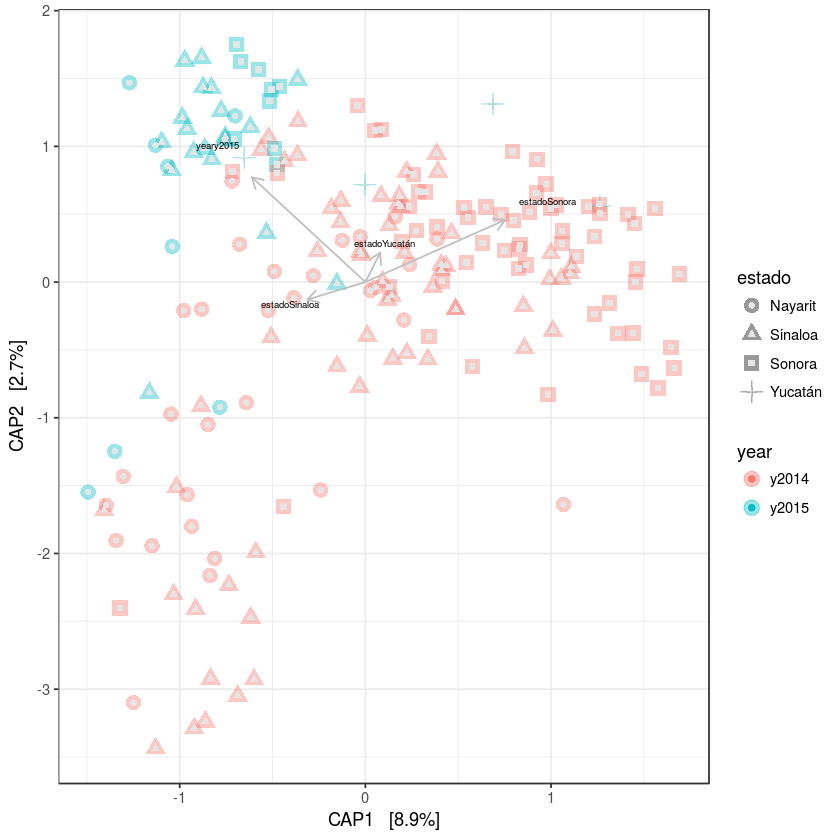

In [43]:
camaronCAP.ORD <- ordinate(camaron2, "CAP", "wunifrac", ~ year + estado )
camaronCAP.ORD

cap_plot <- plot_ordination(camaron2, camaronCAP.ORD, color="year", axes =c(1,2)) + aes(shape= estado) + geom_point(aes(colour = year), alpha=0.4, size=4) + geom_point(colour = "grey90", size=1.5) + theme_bw()

arrowmat <- vegan::scores(camaronCAP.ORD, display="bp")
arrowdf <- data.frame(labels=rownames(arrowmat), arrowmat)

# Define the arrow aesthetic mapping
arrow_map <- aes(xend = CAP1, 
    yend = CAP2, 
    x = 0, 
    y = 0, 
    shape = NULL, 
    color = NULL, 
    label = labels)

label_map <- aes(x = 1.3 * CAP1, 
    y = 1.3 * CAP2, 
    shape = NULL, 
    color = NULL, 
    label = labels)

arrowhead = arrow(length = unit(0.02, "npc"))

cap_plot  + 
  geom_segment(
    mapping = arrow_map, 
    size = .5, 
    data = arrowdf, 
    color = "gray", 
    arrow = arrowhead
  ) + 
  geom_text(
    mapping = label_map, 
    size = 2,  
    data = arrowdf, 
    show.legend = FALSE
  )

an <- anova(camaronCAP.ORD, permutations=9999)
an

Call: capscale(formula = distance ~ year + estado, data = data)

              Inertia Proportion Rank
Total         49.9549     1.0000     
Constrained    8.0321     0.1608    4
Unconstrained 41.9228     0.8392  183
Inertia is squared Unknown distance 

Eigenvalues for constrained axes:
 CAP1  CAP2  CAP3  CAP4 
5.767 1.226 0.600 0.439 

Eigenvalues for unconstrained axes:
 MDS1  MDS2  MDS3  MDS4  MDS5  MDS6  MDS7  MDS8 
3.824 1.788 1.238 1.207 1.140 0.920 0.712 0.648 
(Showed only 8 of all 183 unconstrained eigenvalues)


Df  SumOfSqs  F        Pr(>F)
Model      4  8.032101 8.765361 1e-04 
Residual 183 41.922817       NA    NA

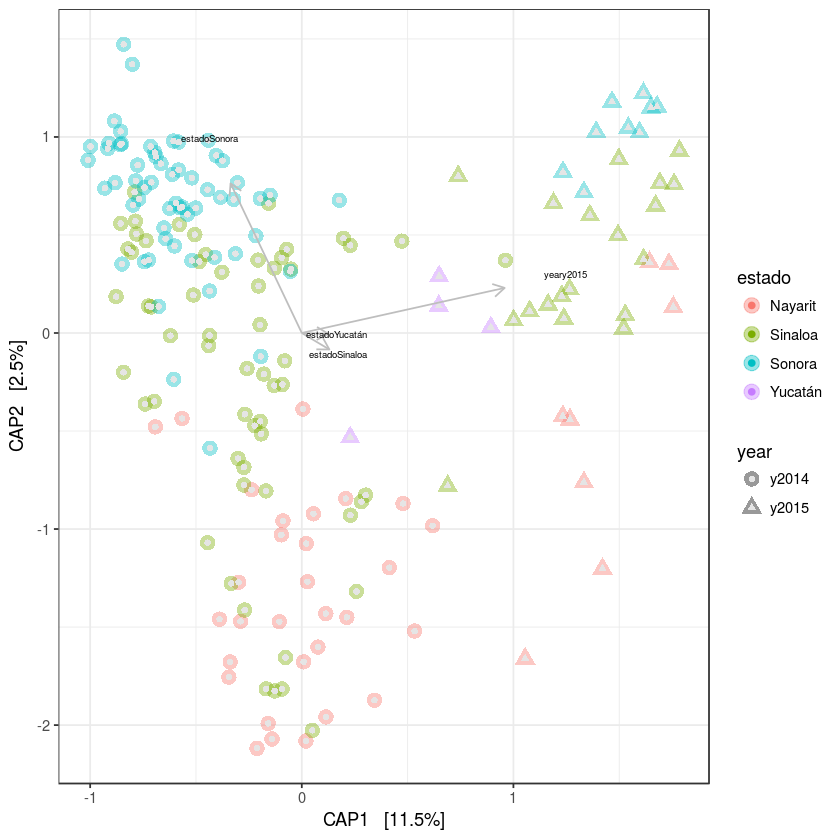

In [44]:
camaronCAP.ORD <- ordinate(camaron2, "CAP", "unifrac", ~ year + estado )
camaronCAP.ORD

cap_plot <- plot_ordination(camaron2, camaronCAP.ORD, color="estado", axes =c(1,2)) + aes(shape= year) + geom_point(aes(colour = estado), alpha=0.4, size=4) + geom_point(colour = "grey90", size=1.5) + theme_bw()

arrowmat <- vegan::scores(camaronCAP.ORD, display="bp")
arrowdf <- data.frame(labels=rownames(arrowmat), arrowmat)

# Define the arrow aesthetic mapping
arrow_map <- aes(xend = CAP1, 
    yend = CAP2, 
    x = 0, 
    y = 0, 
    shape = NULL, 
    color = NULL, 
    label = labels)

label_map <- aes(x = 1.3 * CAP1, 
    y = 1.3 * CAP2, 
    shape = NULL, 
    color = NULL, 
    label = labels)

arrowhead = arrow(length = unit(0.02, "npc"))

cap_plot  + 
  geom_segment(
    mapping = arrow_map, 
    size = .5, 
    data = arrowdf, 
    color = "gray", 
    arrow = arrowhead
  ) + 
  geom_text(
    mapping = label_map, 
    size = 2,  
    data = arrowdf, 
    show.legend = FALSE
  )

an <- anova(camaronCAP.ORD, permutations=9999)
an

In [ ]:
library("doParallel")
camaroncito <- get_variable(camaron2, "estado") 
sample_data(camaron2)$camaroncito <- factor(camaroncito)
colorCodes <- levels(camaroncito)
library(RColorBrewer)
#sample_data(march_subset)
camaronUF <- UniFrac(camaron2, weighted=FALSE, parallel=TRUE)
#colorScale <- colors()[c(26,51,76)]
#colorScale    <-rainbow(length(levels(get_variable(march_subset, "marchantita"))))
colorScale    <- brewer.pal(length(levels(get_variable(camaron2, "camaroncito"))),"Dark2")
#colorScale
cols <- colorScale[get_variable(camaron2, "camaroncito")] 
#cols
#march.tip.labels <- as(get_variable(march_subset, "marchantita"), "character")
# This is the actual hierarchical clustering call, specifying average-link clustering
camaron.hclust     <- hclust(camaronUF, method="average")
library(dendextend)
dend <- as.dendrogram(camaron.hclust)
labels_colors(dend) <- cols[order.dendrogram(dend)]
dend %>% set("labels_cex", .75) %>% plot(main="Unifrac unweighted distances",horiz=T) 
#ggplot(dend, horiz=T)
#plot(march.hclust, col=cols)



clus$labels
clus$order

In [83]:
pdf("un_Unifrac_may18.pdf", paper = "letter", width= 0, height=0)
dend %>% set("labels_cex", 0.35) %>% set("branches_lwd", 0.1) %>% plot(main="Unifrac unweighted distances",horiz=T) 
dev.off()
#ggplot(dend, horiz=T) + theme_light()
#ggsave("un_Unifrac_may18.pdf", width = 27.5, height = 21, units = "cm")

png 
  2

In [84]:

camaroncito <- get_variable(camaron2, "estado") 
sample_data(camaron2)$camaroncito <- factor(camaroncito)
colorCodes <- levels(camaroncito)
library(RColorBrewer)
#sample_data(march_subset)
camaronUF <- UniFrac(camaron2, weighted=TRUE, parallel=TRUE)
#colorScale <- colors()[c(26,51,76)]
#colorScale    <-rainbow(length(levels(get_variable(march_subset, "marchantita"))))
colorScale    <- brewer.pal(length(levels(get_variable(camaron2, "camaroncito"))),"Dark2")
#colorScale
cols <- colorScale[get_variable(camaron2, "camaroncito")] 
#cols
#march.tip.labels <- as(get_variable(march_subset, "marchantita"), "character")
# This is the actual hierarchical clustering call, specifying average-link clustering
camaron.hclust     <- hclust(camaronUF, method="average")
library(dendextend)
dend <- as.dendrogram(camaron.hclust)
labels_colors(dend) <- cols[order.dendrogram(dend)]




In [85]:
pdf("W_Unifrac_may18.pdf", paper = "letter", width= 0, height=0)
dend %>% set("labels_cex", 0.35) %>% set("branches_lwd", 0.1) %>% plot(main="Unifrac weighted distances",horiz=T) 
dev.off()

png 
  2

In [6]:
library(microbiomeSeq)
library(igraph)
library(phyloseq)
physeq <- taxa_level(t(camaron), which_level="Genus")
physeq

#co_occr <- co_occurence_network(physeq, grouping_column = "estado", rhos = 0.1, 
#    method = "cor", qval_threshold = 0.05, select.condition = NULL, scale.vertex.size = 4, 
#    scale.edge.width = 15, plotNetwork = T, plotBetweennessEeigenvalue = F)


#lo anterior guarda las salidas a pdfs en el folder de trabajo, no hay salida a X11





Attaching package: ‘igraph’

The following object is masked from ‘package:vegan’:

    diversity

The following object is masked from ‘package:permute’:

    permute

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 430 taxa and 188 samples ]
sample_data() Sample Data:       [ 188 samples by 12 sample variables ]

In [7]:
physeq <- taxa_level(t(camaron), which_level="Genus")
physeq



co_occr <- co_occurence_network(physeq, grouping_column = "year",  
    method = "cor", select.condition = NULL, scale.vertex.size = 4, 
    scale.edge.width = 15, plotNetwork = T, plotBetweennessEeigenvalue = F)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 430 taxa and 188 samples ]
sample_data() Sample Data:       [ 188 samples by 12 sample variables ]

In [9]:
co_occr <- co_occurence_network(physeq, grouping_column = "estado",  rhos= c(-0.1, 0.1, -0.2, 0.2, -0.5, 0.5, -0.7, 0.7),
    method = "cor", select.condition = NULL, scale.vertex.size = 4, 
    scale.edge.width = 15, plotNetwork = F, plotBetweennessEeigenvalue = F)
require(visNetwork)

g <- co_occr$net$graph
data <- toVisNetworkData(g)
visNetwork(nodes = data$nodes, edges = data$edges, width = 900) %>% visOptions(highlightNearest = TRUE, 
    nodesIdSelection = TRUE)

co_occr <- co_occurence_network(physeq, grouping_column = "year",  rhos= c(-0.1, 0.1, -0.2, 0.2, -0.5, 0.5, -0.7, 0.7),
    method = "cor", select.condition = NULL, scale.vertex.size = 4, 
    scale.edge.width = 15, plotNetwork = F, plotBetweennessEeigenvalue = F)

g <- co_occr$net$graph
data <- toVisNetworkData(g)
visNetwork(nodes = data$nodes, edges = data$edges, width = 900) %>% visOptions(highlightNearest = TRUE, 
    nodesIdSelection = TRUE)


HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

IGRAPH 2b81986 UN-- 2 1 -- 
+ attr: name (v/c), size (v/n), color (v/c), module (v/c), color (e/c),
| width (e/n)
+ edge from 2b81986 (vertex names):
[1] g__Amaricoccus--g__Lutibacterium

In [68]:
colnames(tax_table(camaron))
x1 <- tax_glom(camaron, taxrank="Family") 

# https://www.rdocumentation.org/packages/phyloseq/versions/1.16.2/topics/tax_glom

ntaxa(camaron); ntaxa(x1)


[1] "Kingdom" "Phylum"  "Class"   "Order"   "Family"  "Genus"   "Species"

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 498 taxa and 188 samples ]
sample_data() Sample Data:       [ 188 samples by 12 sample variables ]
tax_table()   Taxonomy Table:    [ 498 taxa by 7 taxonomic ranks ]

[1] 69252

[1] 498

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 498 taxa and 188 samples ]
sample_data() Sample Data:       [ 188 samples by 12 sample variables ]
tax_table()   Taxonomy Table:    [ 498 taxa by 7 taxonomic ranks ]

In [5]:
x2 <- tax_glom(camaron, taxrank="Genus") 
ntaxa(x2)
x2
tax_table(x2)

[1] 864

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 864 taxa and 188 samples ]
sample_data() Sample Data:       [ 188 samples by 12 sample variables ]
tax_table()   Taxonomy Table:    [ 864 taxa by 7 taxonomic ranks ]

Kingdom     Phylum             Class                   
19     k__Bacteria p__Bacteroidetes   c__[Rhodothermi]        
44     k__Bacteria p__Bacteroidetes   c__Flavobacteriia       
60     k__Bacteria p__Bacteroidetes   c__[Saprospirae]        
85     k__Bacteria p__Bacteroidetes   c__Sphingobacteriia     
100    k__Bacteria p__Cyanobacteria   c__Synechococcophycideae
140    k__Bacteria p__Bacteroidetes   c__Cytophagia           
205    k__Bacteria p__Proteobacteria  c__Alphaproteobacteria  
215    k__Bacteria p__Bacteroidetes   c__[Saprospirae]        
228    k__Bacteria p__Bacteroidetes   c__[Saprospirae]        
338    k__Bacteria p__Actinobacteria  c__Acidimicrobiia       
348    k__Bacteria p__Bacteroidetes   c__Cytophagia           
357    k__Bacteria p__Bacteroidetes   c__Sphingobacteriia     
501    k__Bacteria p__Bacteroidetes   c__Bacteroidia          
504    k__Bacteria p__Bacteroidetes   c__Cytophagia           
692    k__Bacteria p__Tenericutes     c__Mollicutes           
711    k__Bacteria p__Bacteroidetes   c__[Rhodothermi]        
777    k__Bacteria p__Proteobacteria  c__Alphaproteobacteria  
834    k__Bacteria p__Bacteroidetes   c__Flavobacteriia       
936    k__Bacteria p__Acidobacteria   c__OS-K                 
1285   k__Bacteria p__Bacteroidetes   c__VC2_1_Bac22          
1381   k__Bacteria p__Cyanobacteria   c__Chloroplast          
1481   k__Bacteria p__Bacteroidetes   c__[Saprospirae]        
1640   k__Bacteria p__Bacteroidetes   c__Flavobacteriia       
1886   k__Bacteria p__Verrucomicrobia c__Verruco-5            
1903   k__Bacteria p__Bacteroidetes   c__Sphingobacteriia     
2185   k__Bacteria p__Proteobacteria  c__Alphaproteobacteria  
2284   k__Bacteria p__Firmicutes      c__Clostridia           
2316   k__Bacteria p__Proteobacteria  c__Alphaproteobacteria  
2342   k__Bacteria p__Bacteroidetes   c__Flavobacteriia       
2482   k__Bacteria p__Bacteroidetes   c__[Rhodothermi]        
⋮      ⋮           ⋮                  ⋮                       
860301 k__Bacteria p__Cyanobacteria   c__Chloroplast          
861111 k__Bacteria p__[Thermi]        c__Deinococci           
862707 k__Bacteria p__Proteobacteria  c__Alphaproteobacteria  
864788 k__Bacteria p__Firmicutes      c__Clostridia           
867239 k__Bacteria p__Cyanobacteria   c__Chloroplast          
868869 k__Bacteria p__Cyanobacteria   c__Chloroplast          
868887 k__Bacteria p__Cyanobacteria   c__Chloroplast          
869051 k__Bacteria p__Fibrobacteres   c__Fibrobacteria        
869111 k__Bacteria p__SBR1093         c__A712011              
869689 k__Bacteria p__Cyanobacteria   c__Chloroplast          
875199 k__Archaea  p__Euryarchaeota   c__Thermoplasmata       
876393 k__Bacteria p__[Thermi]        c__Deinococci           
877152 k__Bacteria p__Firmicutes      c__Clostridia           
878219 k__Bacteria p__Tenericutes     c__Mollicutes           
878573 k__Bacteria p__OP11            c__OP11-4               
878836 k__Bacteria p__Chlorobi        c__Chlorobia            
878930 k__Bacteria p__Proteobacteria  c__Alphaproteobacteria  
879687 k__Bacteria p__Proteobacteria  c__Deltaproteobacteria  
879773 k__Bacteria p__Cyanobacteria   c__Oscillatoriophycideae
880136 k__Bacteria p__OD1             c__                     
882252 k__Bacteria p__Proteobacteria  c__Gammaproteobacteria  
885573 k__Bacteria p__Elusimicrobia   c__Elusimicrobia        
886423 k__Bacteria p__Proteobacteria  c__Alphaproteobacteria  
886480 k__Bacteria p__Proteobacteria  c__Betaproteobacteria   
893218 k__Bacteria p__Proteobacteria  c__Alphaproteobacteria  
893553 k__Bacteria p__Proteobacteria  c__Gammaproteobacteria  
893569 k__Bacteria p__Proteobacteria  c__Deltaproteobacteria  
896745 k__Bacteria p__Proteobacteria  c__Gammaproteobacteria  
896858 k__Bacteria p__Proteobacteria  c__Alphaproteobacteria  
896935 k__Bacteria p__Proteobacteria  c__Gammaproteobacteria  
       Order                 Family                 Genus               
19     o__[Rhodothermales]  

In [4]:
tax_table(camaron)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 69252 taxa and 188 samples ]
sample_data() Sample Data:       [ 188 samples by 12 sample variables ]
tax_table()   Taxonomy Table:    [ 69252 taxa by 7 taxonomic ranks ]

In [78]:
physeq <- taxa_level(t(x2),which_level="Genus")
env.taxa.cor <- taxa.env.correlation(physeq, grouping_column = "estado", method = "pearson", 
    pvalue.threshold = 0.05, padjust.method = "BH", adjustment = 5, num.taxa = 50, 
    select.variables = NULL)

ERROR: Error in cor.test.default(a[complete.cases(b), ], b[complete.cases(b), : not enough finite observations



Call:
adonis(formula = d ~ year + estado, data = df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
year        1     4.985  4.9854 16.1815 0.07551  0.001 ***
estado      3     4.654  1.5514  5.0357 0.07050  0.001 ***
Residuals 183    56.381  0.3081         0.85399           
Total     187    66.020                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

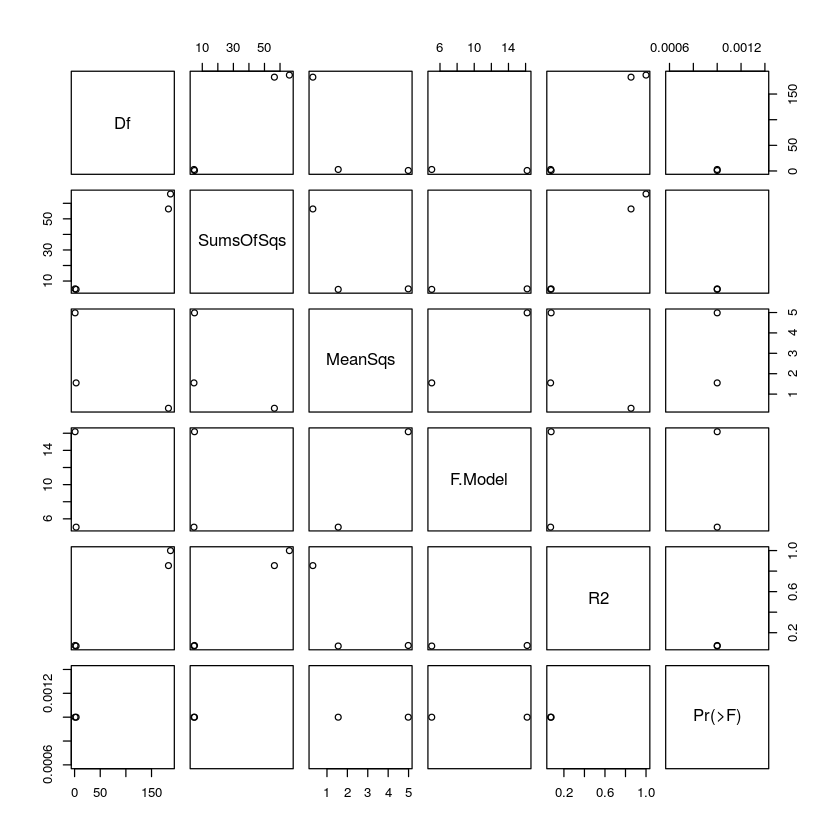

In [86]:
library(vegan)
df = as(sample_data(camaron), "data.frame")
d = distance(camaron, "bray")
camaronadonis = adonis(d ~ year + estado, df)
camaronadonis
plot(camaronadonis$aov.tab)

In [ ]:
library(gridExtra)
library(phylogeo)
require(phytools)


p<-plot_richness(camaron, x="estado", color="year", measures=c("Observed", "Chao1", "Shannon", "Simpson"))
write.table(p$data, "shannon.txt") #de aquí tomé los datos para Shannon, Chao, etc., y hacer una nueva tabla de metadatos
data= read.table("metadata_map.txt", header=T, row.names=1) #los metadatos deben de estar en el mismo orden en el que estan en la tabla de OTUs:  sample_data(camaron)
sampledata = sample_data(data.frame(id=data$sampleid, estado=data$estado, health=data$health, year=data$year, health_1=data$health_1, temperature=data$temperature, pH=data$pH, oxygen=data$oxygen, salinity=data$salinity, chlorophyll=data$chlorophyll, latitude=data$latitude, longitude=data$longitude, samples=data$samples, observed=data$Observed, chao1=data$Chao1, shannon=data$Shannon, simpson=data$Simpson, row.names=sample_names(camaron)))
camaron = phyloseq(OTU, taxi, sampledata)
source("read.newick.R")

tree <- read.newick("camarones.tre")
tree <- collapse.singles(tree)
camaron = phyloseq (OTU, sampledata, taxi, phy_tree(tree))

map_phyloseq(camaron, region="mexico", jitter=TRUE, jitter.x=2,jitter.y=2, size=1,  color="shannon")
map_phyloseq(camaron, region="mexico", jitter=TRUE, jitter.x=2,jitter.y=2, size=1,  color="observed")
map_phyloseq(camaron, region="mexico", jitter=TRUE, jitter.x=2,jitter.y=2,  size=1, color="chao1")
map_phyloseq(camaron, region="mexico", jitter=TRUE, jitter.x=2,jitter.y=2, size=1, color="health")



In [84]:
map_phyloseq(camaron, region="Mexico City", jitter=TRUE, jitter.x=2,jitter.y=2, size=1, color="health")


ERROR: Error in map.poly(database, regions, exact, xlim, ylim, boundary, interior, : no recognized region names


In [3]:
library(ggplot2)
library(phyloseq)
library(DESeq2)
library(RColorBrewer)
packageVersion("DESeq2")

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min


Attaching packag

[1] ‘1.18.1’

In [29]:
library(ggplot2)
library(phyloseq)
library(DESeq2)
library(RColorBrewer)
packageVersion("DESeq2")
#primero hay que ver las variables que queremos comparar

camaron

#luego exploramos los datos:

head(sample_data(camaron))

#De las gráficas anteriores vimos que la mejor explicación para los camarones es el año de muestreo, vamos comparando el 2014 y 2015

head(sample_data(camaron)$year, 100)

#si hubiera falta de valores (2014 o 2015) con NAs, habría necesidad de quitarlos esto se puede hacer de la siguiente forma:
#subcamaron = subset_samples(camaron, year != "NA")

camaron_ysig = subset_samples(camaron, year != "NA")



#se convierte el objeto de phyloseq a deseq2 y luego se calculan los valores de log2FoldChange y lfcSE p-value y padj
obj1deseq = phyloseq_to_deseq2(camaron_ysig, ~year)

#adición de https://github.com/joey711/phyloseq/issues/387

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans = apply(counts(obj1deseq), 1, gm_mean)
obj1deseq = estimateSizeFactors(obj1deseq, geoMeans = geoMeans)

##adición de la viñeta para el error de la media de 0s
obj1deseq = DESeq(obj1deseq, fitType="local")

#obj1deseq = DESeq(obj1deseq, test="Wald", fitType="parametric")


res = results(obj1deseq, cooksCutoff = FALSE)
# quick explanation of Cook's distance: it measures within each gene, for each sample, how removing that sample would change the LFCs (all of the coefficients implied by the design and estimated by DESeq2). So if you have e.g. 3 samples vs 2 samples, and the counts for a gene are [10,10,10] vs [15, 1000], you can see how the Cook's distance will be high for the two samples. Removing either one changes the LFC for the comparison of the two groups. However, if it were [10,10,10] vs [50,50], the two samples "support" each other, such that removing one doesn't change the LFC at all. Hence, we find Cook's to be useful for identifying outliers.
alpha = 0.01
sigtab = res[which(res$padj < alpha), ]
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(camaron_ysig)[rownames(sigtab), ], "matrix"))
# Phylum order
x = tapply(sigtab$log2FoldChange, sigtab$Phylum, function(x) max(x))
x = sort(x, TRUE)
sigtab$Phylum = factor(as.character(sigtab$Phylum), levels=names(x))
# Genus order
x = tapply(sigtab$log2FoldChange, sigtab$Genus, function(x) max(x))
x = sort(x, TRUE)
sigtab$Genus = factor(as.character(sigtab$Genus), levels=names(x))
    

[1] ‘1.18.1’

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 69252 taxa and 188 samples ]
sample_data() Sample Data:       [ 188 samples by 12 sample variables ]
tax_table()   Taxonomy Table:    [ 69252 taxa by 7 taxonomic ranks ]

id      estado  health year  health.1 temperature pH oxygen salinity
nay1410 nay1410 Nayarit none   y2014 none     NA          NA NA     NA      
nay1419 nay1419 Nayarit none   y2014 none     NA          NA NA     NA      
nay141  nay141  Nayarit light  y2014 light    NA          NA NA     NA      
nay1421 nay1421 Nayarit light  y2014 light    NA          NA NA     NA      
nay1426 nay1426 Nayarit none   y2014 none     NA          NA NA     NA      
nay142  nay142  Nayarit severe y2014 severe   NA          NA NA     NA      
        chlorophyll latitude longitude
nay1410 NA                NA        NA
nay1419 NA          22.52131 -105.6313
nay141  NA          21.62359 -105.3167
nay1421 NA          22.58380 -105.6478
nay1426 NA          22.52986 -105.6454
nay142  NA          21.62302 -105.3165

[1] y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2014
 [13] y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2014
 [25] y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2015 y2015 y2015 y2015
 [37] y2015 y2015 y2015 y2015 y2015 y2015 y2015 y2015 y2015 y2015 y2015 y2015
 [49] y2015 y2015 y2015 y2015 y2015 y2015 y2015 y2015 y2015 y2015 y2015 y2014
 [61] y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2014
 [73] y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2014
 [85] y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2014 y2014
 [97] y2014 y2014 y2014 y2014
Levels: y2014 y2015

converting counts to integer mode
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 1210 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


baseMean    log2FoldChange lfcSE     stat      pvalue       padj        
17     113.1605612  1.350257      0.4240810  3.183960 1.452751e-03 8.359328e-03
19       1.3285685  3.709809      0.4553439  8.147268 3.722371e-16 2.685536e-14
87      11.8601442 -2.280944      0.7085914 -3.218983 1.286460e-03 7.544409e-03
180     14.3995030  3.105106      0.5395209  5.755302 8.648707e-09 1.772217e-07
218     63.7563970  2.570513      0.5034159  5.106141 3.288035e-07 4.886895e-06
231     44.5320079  2.392488      0.4920424  4.862362 1.159933e-06 1.533148e-05
250      7.5544975  2.269916      0.6574231  3.452748 5.549071e-04 3.639476e-03
256     29.4297648  3.207655      0.5076428  6.318725 2.637305e-10 7.135146e-09
257      8.6901703  2.313150      0.5254303  4.402392 1.070641e-05 1.113402e-04
258      8.2614642  2.901654      0.5317553  5.456747 4.849358e-08 8.611962e-07
269      5.5576738  2.215317      0.5136693  4.312729 1.612516e-05 1.600041e-04
278     75.2251569  3.358939      0.4536134  7.404850 1.312985e-13 6.144416e-12
281      4.3189642 -2.109136      0.5399619 -3.906083 9.380436e-05 7.554523e-04
296      2.1369070  2.745424      0.4776263  5.748059 9.027354e-09 1.838925e-07
338    346.8971230  4.752540      0.4670205 10.176299 2.530016e-24 7.301204e-22
374      0.9834639  2.097314      0.6400736  3.276676 1.050367e-03 6.336971e-03
386      1.0896397  3.915402      0.5818231  6.729541 1.701995e-11 5.358191e-10
575      0.3827223  2.369185      0.7133511  3.321204 8.962989e-04 5.493598e-03
591      1.6655849 -2.485528      0.5579974 -4.454371 8.413931e-06 8.965368e-05
701      1.6843112  4.486296      0.5233117  8.572896 1.009148e-17 1.027847e-15
713      2.7867427 -2.316382      0.5536955 -4.183495 2.870620e-05 2.665136e-04
724      3.8922460 -2.271049      0.6649386 -3.415427 6.368213e-04 4.061349e-03
834      0.4845259  2.271864      0.6785946  3.347895 8.142784e-04 5.044447e-03
885      1.1119658 -2.032821      0.6329384 -3.211721 1.319424e-03 7.692197e-03
890      1.9413833 -2.475502      0.6560103 -3.773571 1.609272e-04 1.224815e-03
896      2.1022693 -1.900454      0.5386616 -3.528104 4.185483e-04 2.864492e-03
925      0.9328344 -2.173532      0.6198281 -3.506670 4.537523e-04 3.039350e-03
944      1.4580485 -2.600095      0.6006662 -4.328686 1.500018e-05 1.499027e-04
953     25.4453821 -1.745978      0.4671228 -3.737728 1.856907e-04 1.379929e-03
962      0.9196281 -2.070897      0.6039460 -3.428945 6.059328e-04 3.900270e-03
⋮      ⋮           ⋮              ⋮         ⋮         ⋮            ⋮           
522448  1.4675699   2.052342      0.5215506  3.935078 8.316955e-05 6.776850e-04
522620  0.9780888   3.002251      0.6913009  4.342901 1.406136e-05 1.422791e-04
535775 12.1098405  -3.625917      0.5803496 -6.247815 4.162338e-10 1.084107e-08
536495  3.0229204  -3.137911      0.6326034 -4.960313 7.037958e-07 9.788132e-06
536851  2.7652904  -3.544302      0.6846103 -5.177109 2.253505e-07 3.422758e-06
537678  2.2696356  -3.938420      1.0417911 -3.780431 1.565571e-04 1.196815e-03
538271  1.8534243  -3.647054      0.9502220 -3.838107 1.239866e-04 9.692230e-04
540460  0.5474775   3.093282      0.9041448  3.421224 6.233987e-04 3.990443e-03
540821  0.3483855   2.972517      0.8621186  3.447922 5.649180e-04 3.681527e-03
540959  0.4396262   2.093784      0.5849009  3.579725 3.439557e-04 2.396617e-03
541282  0.8238739   4.211225      1.3429301  3.135848 1.713580e-03 9.712154e-03
541462  0.5209009   3.688734      0.8990512  4.102919 4.079707e-05 3.631883e-04
541497  0.7188427   1.975403      0.5281824  3.740001 1.840195e-04 1.373404e-03
541681  1.7156969  -2.997887      0.7382875 -4.060596 4.894754e-05 4.237633e-04
542942  0.9714890   3.204893      0.6858978  4.672552 2.974800e-06 3.552322e-05
544406  0.6007382   3.565889      0.7486205  4.763280 1.904715e-06 2.396369e-05
548928  5.0135759  -3.150439      0.7034841 -4.478336 7.522699e-06 8.090406e-05
551009  1.8125226   5.475265      1.0599235  5.165717 2.395184e-07 3.622062e-06
555514 

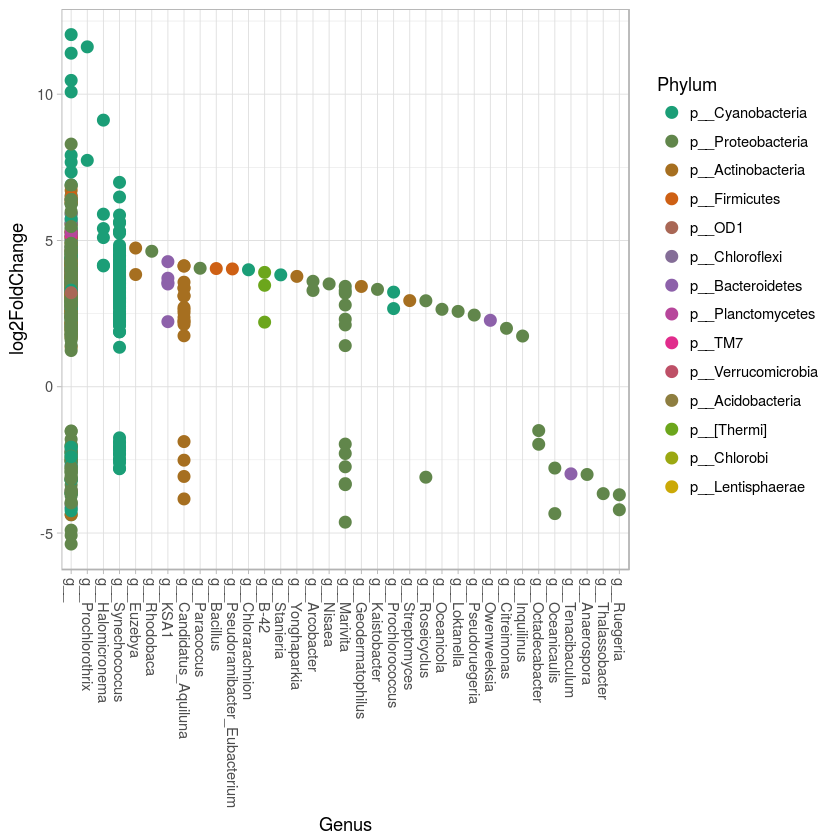

In [50]:
ggplot(sigtab, aes(x=Genus, y=log2FoldChange, color=Phylum)) + scale_color_manual(values=colorRampPalette(brewer.pal(8,"Dark2"))(20))+geom_point(size=3)+theme_light() +theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
sigtab
write.table(sigtab, "sigtab2014-2015.txt")
#arriba 2015, abajo 2014

Comparando el estado de salud "light" con el severo

converting counts to integer mode
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 862 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


baseMean log2FoldChange lfcSE    stat      pvalue       padj       
52762 6.120335 -17.73156      3.362286 -5.273662 1.337285e-07 0.006124763
      Kingdom     Phylum           Class          Order            Family Genus
52762 k__Bacteria p__Cyanobacteria c__Chloroplast o__Stramenopiles f__    g__  
      Species
52762 s__

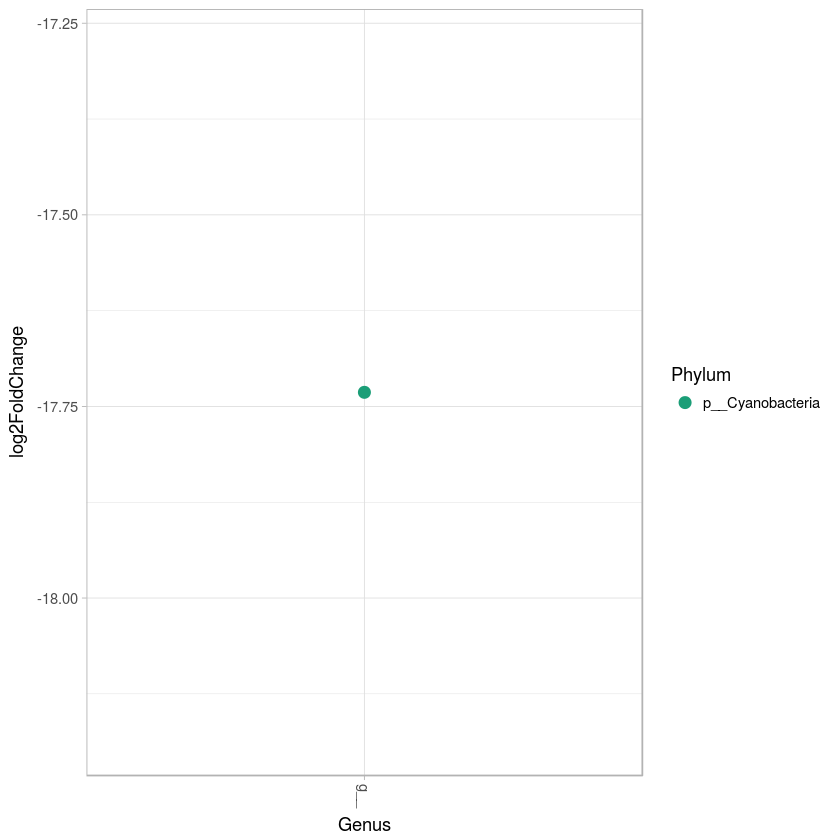

In [24]:
camaron_lightseveresig = subset_samples(camaron, health != c("mild","NA"))
sample_data(camaron_lightseveresig)$light = factor (get_variable(camaron_lightseveresig, "health") %in% c("light"))
obj1deseq = phyloseq_to_deseq2(camaron_lightseveresig, ~health)

obj9 = obj1deseq
gm_mean = function(x, na.rm=TRUE){  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))}
geoMeans = apply(counts(obj9), 1, gm_mean)

obj9 = estimateSizeFactors(obj9, geoMeans = geoMeans)
obj9 = DESeq(obj9, fitType="local")
res = results(obj9, cooksCutoff = FALSE)
alpha = 0.05
sigtab9 = res[which(res$padj < alpha), ]
sigtab9 = cbind(as(sigtab9, "data.frame"), as(tax_table(camaron_lightseveresig)[rownames(sigtab9), ], "matrix"))
# Phylum order
x = tapply(sigtab9$log2FoldChange, sigtab9$Phylum, function(x) max(x))
x = sort(x, TRUE)
sigtab9$Phylum = factor(as.character(sigtab9$Phylum), levels=names(x))
# Genus order
x = tapply(sigtab9$log2FoldChange, sigtab9$Genus, function(x) max(x))
x = sort(x, TRUE)
sigtab9$Genus = factor(as.character(sigtab9$Genus), levels=names(x))
    
ggplot(sigtab9, aes(x=Genus, y=log2FoldChange, color=Phylum)) + scale_color_manual(values=colorRampPalette(brewer.pal(8,"Dark2"))(20))+geom_point(size=3)+theme_light() +theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
sigtab9

converting counts to integer mode
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [T

baseMean   log2FoldChange lfcSE    stat       pvalue       padj        
8      198.146252 -11.161184     1.772856  -6.295594 3.062251e-10 6.717813e-08
57     284.402796 -12.477996     1.863149  -6.697260 2.123630e-11 6.211618e-09
87      21.182960  -8.495586     2.075820  -4.092640 4.264895e-05 3.055058e-03
100    824.172449 -10.195527     1.368649  -7.449338 9.380951e-14 4.115892e-11
102     10.777368  -7.346793     1.838484  -3.996114 6.439069e-05 4.185395e-03
207     35.664930  -9.019911     1.777549  -5.074352 3.888192e-07 5.054649e-05
208     88.866512  -9.752988     1.735892  -5.618432 1.926983e-08 3.220814e-06
268     91.546952  -8.578298     1.576809  -5.440289 5.319410e-08 7.779638e-06
290     75.911153 -10.128787     1.833550  -5.524141 3.311011e-08 5.052890e-06
1263    43.121958 -17.433538     2.073528  -8.407671 4.182330e-17 2.097140e-14
2821    20.757282  -8.087211     1.731125  -4.671650 2.987893e-06 2.913195e-04
2938   781.129999   5.027884     1.025508   4.902822 9.446951e-07 1.105293e-04
3302     9.922281 -22.761812     2.557168  -8.901181 5.525562e-19 4.848681e-16
3357    70.017571 -10.333401     1.640521  -6.298851 2.998594e-10 6.717813e-08
3446    86.653584  -7.502720     1.764988  -4.250861 2.129499e-05 1.738265e-03
3819    27.400549  -7.310868     1.640221  -4.457246 8.301944e-06 7.284955e-04
4229    15.123985 -23.356633     4.547553  -5.136088 2.805158e-07 3.786964e-05
4587    28.417245  -9.241671     1.847941  -5.001063 5.701496e-07 6.900776e-05
5327    20.317505 -23.576539     2.243783 -10.507493 7.978613e-26 1.400247e-22
5358    77.110161 -10.462112     1.891772  -5.530323 3.196414e-08 5.052890e-06
6910   295.087802  -8.866214     1.549487  -5.722033 1.052571e-08 1.847263e-06
7256    54.850469 -20.631368     4.359462  -4.732549 2.217178e-06 2.302717e-04
9468    13.156401  -7.374584     1.895671  -3.890224 1.001516e-04 6.167228e-03
9543     9.817722  -6.204640     1.649491  -3.761549 1.688644e-04 9.878569e-03
9617    23.885092   8.322828     2.154746   3.862556 1.122067e-04 6.790439e-03
10204   48.837341  -6.751027     1.530026  -4.412360 1.022501e-05 8.753608e-04
10224    5.728957 -21.892616     5.609735  -3.902612 9.516031e-05 5.964512e-03
10413    5.566575 -20.764520     2.387883  -8.695785 3.444387e-18 2.014966e-15
10593  102.701875 -10.144341     1.770315  -5.730247 1.002846e-08 1.847263e-06
11457   32.909486 -24.149079     2.178529 -11.085038 1.482872e-28 5.204879e-25
12538   43.589558  -6.982990     1.548535  -4.509418 6.500576e-06 6.166763e-04
20055  192.682608  -4.695950     1.224319  -3.835562 1.252776e-04 7.452956e-03
21433  108.188878 -24.171028     3.430530  -7.045858 1.843224e-12 6.469715e-10
21461   44.388649 -21.268201     3.354856  -6.339527 2.304721e-10 5.778266e-08
21592    9.897852 -22.638331     3.064065  -7.388333 1.486811e-13 5.798562e-11
21598    4.745524 -21.402496     2.422141  -8.836188 9.904034e-19 6.952632e-16
21845  635.669165  -4.875166     1.024864  -4.756889 1.965995e-06 2.156450e-04
22698    5.592836   9.401653     2.245346   4.187173 2.824509e-05 2.109368e-03
37779   23.026553  -7.143758     1.522855  -4.691029 2.718341e-06 2.726108e-04
38860    9.094482 -18.824899     4.217393  -4.463634 8.058105e-06 7.252294e-04
39733   35.562352   9.835876     2.184341   4.502904 6.703119e-06 6.191565e-04
40349   10.425221  -7.068264     1.672451  -4.226292 2.375740e-05 1.853078e-03
41175    3.091264 -20.757526     3.501212  -5.928669 3.053992e-09 5.955285e-07
41895    8.232597  -7.391739     1.764173  -4.189917 2.790561e-05 2.109368e-03
42973   67.690035  -8.853258     2.086653  -4.242803 2.207447e-05 1.760941e-03
44223   13.110972 -22.776356     2.516702  -9.050082 1.428609e-19 1.671473e-16
47249  118.548035  -7.058142     1.762604  -4.004382 6.217977e-05 4.117943e-03
47286  711.270376  -8.949161     1.328751  -6.735018 1.639101e-11 5.230221e-09
53479   11.021599 -22.930015     4.561677  -5.026664 4.990862e-07 6.256402e-05
57446   17.622227 -23.497576     3.921668  -5.991730 2.07

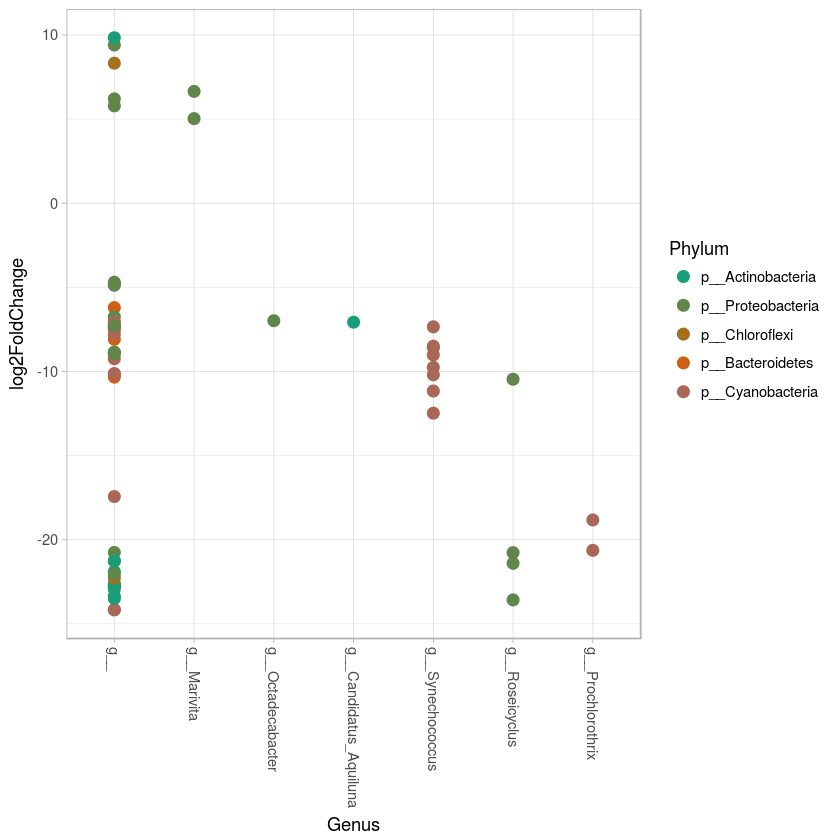

In [6]:
camaron_lightseveresig = subset_samples(camaron, estado != "NA")
sample_data(camaron_lightseveresig)$light = factor (get_variable(camaron_lightseveresig, "estado") %in% c("Sinaloa"))
obj1deseq = phyloseq_to_deseq2(camaron_lightseveresig, ~estado)

obj9 = obj1deseq
gm_mean = function(x, na.rm=TRUE){  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))}
geoMeans = apply(counts(obj9), 1, gm_mean)

obj9 = estimateSizeFactors(obj9, geoMeans = geoMeans)
obj9 = DESeq(obj9, fitType="local")
res = results(obj9, cooksCutoff = FALSE)
alpha = 0.01
sigtab9 = res[which(res$padj < alpha), ]
sigtab9 = cbind(as(sigtab9, "data.frame"), as(tax_table(camaron_lightseveresig)[rownames(sigtab9), ], "matrix"))
# Phylum order
x = tapply(sigtab9$log2FoldChange, sigtab9$Phylum, function(x) max(x))
x = sort(x, TRUE)
sigtab9$Phylum = factor(as.character(sigtab9$Phylum), levels=names(x))
# Genus order
x = tapply(sigtab9$log2FoldChange, sigtab9$Genus, function(x) max(x))
x = sort(x, TRUE)
sigtab9$Genus = factor(as.character(sigtab9$Genus), levels=names(x))
    
ggplot(sigtab9, aes(x=Genus, y=log2FoldChange, color=Phylum)) + scale_color_manual(values=colorRampPalette(brewer.pal(8,"Dark2"))(20))+geom_point(size=3)+theme_light() +theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
sigtab9

converting counts to integer mode
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [T

baseMean    log2FoldChange lfcSE    stat      pvalue       padj        
8       184.392725 -11.223237     2.120527 -5.292663 1.205477e-07 5.652999e-05
57      228.320920 -12.829506     2.170074 -5.912013 3.379517e-09 2.008560e-06
87       21.992460  -9.561332     2.350056 -4.068555 4.730566e-05 8.878525e-03
100     735.138025 -10.623797     1.620488 -6.555924 5.529823e-11 6.819015e-08
105       9.434043 -22.897529     3.495570 -6.550442 5.736692e-11 6.819015e-08
207      36.081593  -9.563450     2.113566 -4.524794 6.045443e-06 1.539861e-03
208      91.281547  -9.926178     2.120512 -4.681029 2.854382e-06 8.482270e-04
268      89.540639  -8.576847     1.818165 -4.717309 2.389847e-06 7.747449e-04
290      56.784935 -11.086767     2.165415 -5.119927 3.056547e-07 1.211072e-04
2821     16.648539  -8.731749     2.067652 -4.223026 2.410436e-05 5.056244e-03
2938   1036.393469   5.872073     1.213416  4.839292 1.303023e-06 4.646580e-04
3357     55.571294 -10.779999     1.786621 -6.033736 1.602118e-09 1.428288e-06
5358     15.603137  -8.907650     1.934386 -4.604897 4.126696e-06 1.131984e-03
6910    277.281020 -10.153540     1.921788 -5.283383 1.268199e-07 5.652999e-05
11894    36.217730  -8.617632     2.061753 -4.179759 2.918177e-05 5.781233e-03
21845   640.005123  -5.207058     1.178088 -4.419922 9.873653e-06 2.200590e-03
37779    22.243590  -7.728537     1.728226 -4.471948 7.751036e-06 1.842680e-03
47286   745.048748 -10.084152     1.694721 -5.950333 2.675973e-09 1.908504e-06
170911   14.699246 -20.879856     2.229601 -9.364839 7.616604e-21 2.716081e-17
       Kingdom     Phylum            Class                   
8      k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
57     k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
87     k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
100    k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
105    k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
207    k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
208    k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
268    k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
290    k__Bacteria p__Cyanobacteria  c__Chloroplast          
2821   k__Bacteria p__Bacteroidetes  c__Flavobacteriia       
2938   k__Bacteria p__Proteobacteria c__Alphaproteobacteria  
3357   k__Bacteria p__Bacteroidetes  c__Flavobacteriia       
5358   k__Bacteria p__Proteobacteria c__Alphaproteobacteria  
6910   k__Bacteria p__Proteobacteria c__Alphaproteobacteria  
11894  k__Bacteria p__Proteobacteria c__Alphaproteobacteria  
21845  k__Bacteria p__Proteobacteria c__Alphaproteobacteria  
37779  k__Bacteria p__Proteobacteria c__Alphaproteobacteria  
47286  k__Bacteria p__Proteobacteria c__Alphaproteobacteria  
170911 k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
       Order               Family               Genus           
8      o__Synechococcales  f__Synechococcaceae  g__Synechococcus
57     o__Synechococcales  f__Synechococcaceae  g__Synechococcus
87     o__Synechococcales  f__Synechococcaceae  g__Synechococcus
100    o__Synechococcales  f__Synechococcaceae  g__Synechococcus
105    o__Synechococcales  f__Synechococcaceae  g__Synechococcus
207    o__Synechococcales  f__Synechococcaceae  g__Synechococcus
208    o__Synechococcales  f__Synechococcaceae  g__Synechococcus
268    o__Synechococcales  f__Synechococcaceae  g__Synechococcus
290    o__Chlorophyta      f__                  g__             
2821   o__Flavobacteriales f__Flavobacteriaceae g__             
2938   o__Rhodobacterales  f__Rhodobacteraceae  g__Marivita     
3357   o__Flavobacteriales f__Flavobacteriaceae g__             
5358   o__Rhodobacterales  f__Rhodobacteraceae  g__Roseicyclus  
6910   o__Rickettsiales    f__Pelagibacteraceae g__             
11894  o__                 f__                  g__             
21845  o__Rhodobacterales  f__Rhodobacteraceae  g__             
37779  o__Rhodobacterales  f__Rhodobacteraceae  g__             
47286  o__Rickett

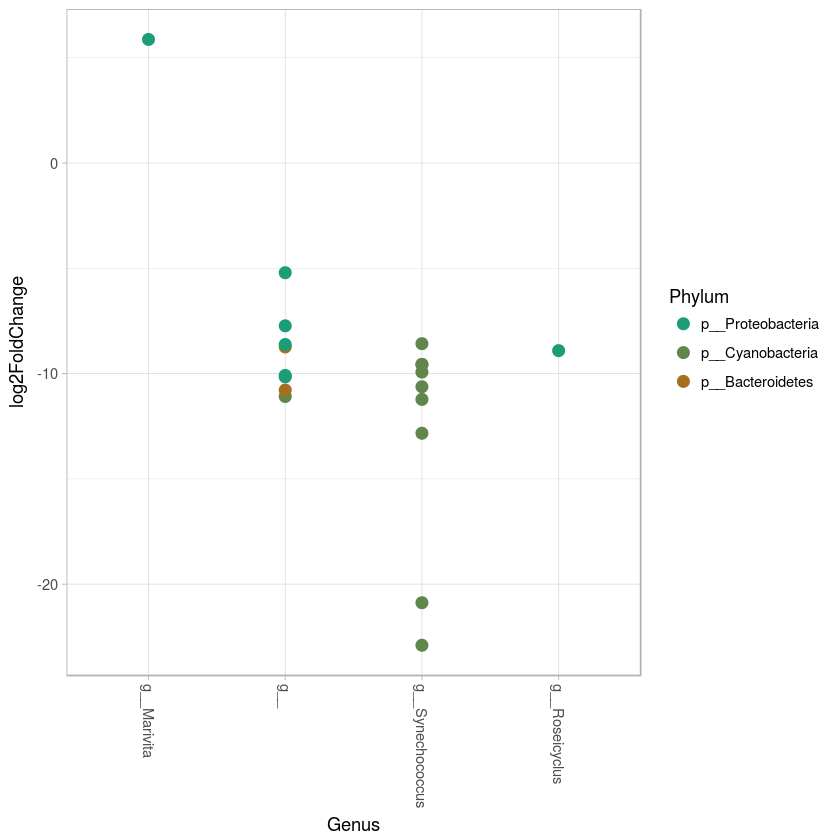

In [9]:
sample_data(camaron_lightseveresig)$light = factor (get_variable(camaron_lightseveresig, "estado") %in% c("Sonora"))
obj1deseq = phyloseq_to_deseq2(camaron_lightseveresig, ~estado)

obj9 = obj1deseq
gm_mean = function(x, na.rm=TRUE){  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))}
geoMeans = apply(counts(obj9), 1, gm_mean)

obj9 = estimateSizeFactors(obj9, geoMeans = geoMeans)
obj9 = DESeq(obj9, fitType="local")
res = results(obj9, cooksCutoff = FALSE)
alpha = 0.01
sigtab9 = res[which(res$padj < alpha), ]
sigtab9 = cbind(as(sigtab9, "data.frame"), as(tax_table(camaron_lightseveresig)[rownames(sigtab9), ], "matrix"))
# Phylum order
x = tapply(sigtab9$log2FoldChange, sigtab9$Phylum, function(x) max(x))
x = sort(x, TRUE)
sigtab9$Phylum = factor(as.character(sigtab9$Phylum), levels=names(x))
# Genus order
x = tapply(sigtab9$log2FoldChange, sigtab9$Genus, function(x) max(x))
x = sort(x, TRUE)
sigtab9$Genus = factor(as.character(sigtab9$Genus), levels=names(x))
    
ggplot(sigtab9, aes(x=Genus, y=log2FoldChange, color=Phylum)) + scale_color_manual(values=colorRampPalette(brewer.pal(8,"Dark2"))(20))+geom_point(size=3)+theme_light() +theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
sigtab9

converting counts to integer mode
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [T

baseMean    log2FoldChange lfcSE    stat      pvalue       padj        
8       184.392725 -11.223237     2.120527 -5.292663 1.205477e-07 5.652999e-05
57      228.320920 -12.829506     2.170074 -5.912013 3.379517e-09 2.008560e-06
87       21.992460  -9.561332     2.350056 -4.068555 4.730566e-05 8.878525e-03
100     735.138025 -10.623797     1.620488 -6.555924 5.529823e-11 6.819015e-08
105       9.434043 -22.897529     3.495570 -6.550442 5.736692e-11 6.819015e-08
207      36.081593  -9.563450     2.113566 -4.524794 6.045443e-06 1.539861e-03
208      91.281547  -9.926178     2.120512 -4.681029 2.854382e-06 8.482270e-04
268      89.540639  -8.576847     1.818165 -4.717309 2.389847e-06 7.747449e-04
290      56.784935 -11.086767     2.165415 -5.119927 3.056547e-07 1.211072e-04
2821     16.648539  -8.731749     2.067652 -4.223026 2.410436e-05 5.056244e-03
2938   1036.393469   5.872073     1.213416  4.839292 1.303023e-06 4.646580e-04
3357     55.571294 -10.779999     1.786621 -6.033736 1.602118e-09 1.428288e-06
5358     15.603137  -8.907650     1.934386 -4.604897 4.126696e-06 1.131984e-03
6910    277.281020 -10.153540     1.921788 -5.283383 1.268199e-07 5.652999e-05
11894    36.217730  -8.617632     2.061753 -4.179759 2.918177e-05 5.781233e-03
21845   640.005123  -5.207058     1.178088 -4.419922 9.873653e-06 2.200590e-03
37779    22.243590  -7.728537     1.728226 -4.471948 7.751036e-06 1.842680e-03
47286   745.048748 -10.084152     1.694721 -5.950333 2.675973e-09 1.908504e-06
170911   14.699246 -20.879856     2.229601 -9.364839 7.616604e-21 2.716081e-17
       Kingdom     Phylum            Class                   
8      k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
57     k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
87     k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
100    k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
105    k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
207    k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
208    k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
268    k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
290    k__Bacteria p__Cyanobacteria  c__Chloroplast          
2821   k__Bacteria p__Bacteroidetes  c__Flavobacteriia       
2938   k__Bacteria p__Proteobacteria c__Alphaproteobacteria  
3357   k__Bacteria p__Bacteroidetes  c__Flavobacteriia       
5358   k__Bacteria p__Proteobacteria c__Alphaproteobacteria  
6910   k__Bacteria p__Proteobacteria c__Alphaproteobacteria  
11894  k__Bacteria p__Proteobacteria c__Alphaproteobacteria  
21845  k__Bacteria p__Proteobacteria c__Alphaproteobacteria  
37779  k__Bacteria p__Proteobacteria c__Alphaproteobacteria  
47286  k__Bacteria p__Proteobacteria c__Alphaproteobacteria  
170911 k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
       Order               Family               Genus           
8      o__Synechococcales  f__Synechococcaceae  g__Synechococcus
57     o__Synechococcales  f__Synechococcaceae  g__Synechococcus
87     o__Synechococcales  f__Synechococcaceae  g__Synechococcus
100    o__Synechococcales  f__Synechococcaceae  g__Synechococcus
105    o__Synechococcales  f__Synechococcaceae  g__Synechococcus
207    o__Synechococcales  f__Synechococcaceae  g__Synechococcus
208    o__Synechococcales  f__Synechococcaceae  g__Synechococcus
268    o__Synechococcales  f__Synechococcaceae  g__Synechococcus
290    o__Chlorophyta      f__                  g__             
2821   o__Flavobacteriales f__Flavobacteriaceae g__             
2938   o__Rhodobacterales  f__Rhodobacteraceae  g__Marivita     
3357   o__Flavobacteriales f__Flavobacteriaceae g__             
5358   o__Rhodobacterales  f__Rhodobacteraceae  g__Roseicyclus  
6910   o__Rickettsiales    f__Pelagibacteraceae g__             
11894  o__                 f__                  g__             
21845  o__Rhodobacterales  f__Rhodobacteraceae  g__             
37779  o__Rhodobacterales  f__Rhodobacteraceae  g__             
47286  o__Rickett

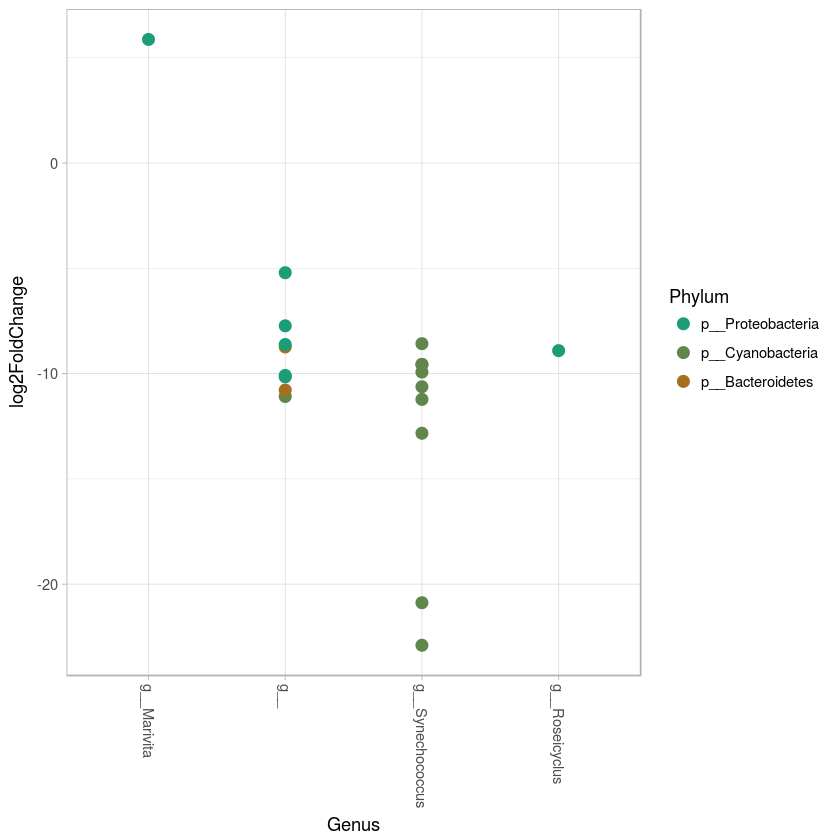

In [10]:
sample_data(camaron_lightseveresig)$light = factor (get_variable(camaron_lightseveresig, "estado") %in% c("Nayarit"))
obj1deseq = phyloseq_to_deseq2(camaron_lightseveresig, ~estado)

obj9 = obj1deseq
gm_mean = function(x, na.rm=TRUE){  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))}
geoMeans = apply(counts(obj9), 1, gm_mean)

obj9 = estimateSizeFactors(obj9, geoMeans = geoMeans)
obj9 = DESeq(obj9, fitType="local")
res = results(obj9, cooksCutoff = FALSE)
alpha = 0.01
sigtab9 = res[which(res$padj < alpha), ]
sigtab9 = cbind(as(sigtab9, "data.frame"), as(tax_table(camaron_lightseveresig)[rownames(sigtab9), ], "matrix"))
# Phylum order
x = tapply(sigtab9$log2FoldChange, sigtab9$Phylum, function(x) max(x))
x = sort(x, TRUE)
sigtab9$Phylum = factor(as.character(sigtab9$Phylum), levels=names(x))
# Genus order
x = tapply(sigtab9$log2FoldChange, sigtab9$Genus, function(x) max(x))
x = sort(x, TRUE)
sigtab9$Genus = factor(as.character(sigtab9$Genus), levels=names(x))
    
ggplot(sigtab9, aes(x=Genus, y=log2FoldChange, color=Phylum)) + scale_color_manual(values=colorRampPalette(brewer.pal(8,"Dark2"))(20))+geom_point(size=3)+theme_light() +theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
sigtab9

converting counts to integer mode
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [T

baseMean    log2FoldChange lfcSE    stat      pvalue       padj        
8       184.392725 -11.223237     2.120527 -5.292663 1.205477e-07 5.652999e-05
57      228.320920 -12.829506     2.170074 -5.912013 3.379517e-09 2.008560e-06
87       21.992460  -9.561332     2.350056 -4.068555 4.730566e-05 8.878525e-03
100     735.138025 -10.623797     1.620488 -6.555924 5.529823e-11 6.819015e-08
105       9.434043 -22.897529     3.495570 -6.550442 5.736692e-11 6.819015e-08
207      36.081593  -9.563450     2.113566 -4.524794 6.045443e-06 1.539861e-03
208      91.281547  -9.926178     2.120512 -4.681029 2.854382e-06 8.482270e-04
268      89.540639  -8.576847     1.818165 -4.717309 2.389847e-06 7.747449e-04
290      56.784935 -11.086767     2.165415 -5.119927 3.056547e-07 1.211072e-04
2821     16.648539  -8.731749     2.067652 -4.223026 2.410436e-05 5.056244e-03
2938   1036.393469   5.872073     1.213416  4.839292 1.303023e-06 4.646580e-04
3357     55.571294 -10.779999     1.786621 -6.033736 1.602118e-09 1.428288e-06
5358     15.603137  -8.907650     1.934386 -4.604897 4.126696e-06 1.131984e-03
6910    277.281020 -10.153540     1.921788 -5.283383 1.268199e-07 5.652999e-05
11894    36.217730  -8.617632     2.061753 -4.179759 2.918177e-05 5.781233e-03
21845   640.005123  -5.207058     1.178088 -4.419922 9.873653e-06 2.200590e-03
37779    22.243590  -7.728537     1.728226 -4.471948 7.751036e-06 1.842680e-03
47286   745.048748 -10.084152     1.694721 -5.950333 2.675973e-09 1.908504e-06
170911   14.699246 -20.879856     2.229601 -9.364839 7.616604e-21 2.716081e-17
       Kingdom     Phylum            Class                   
8      k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
57     k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
87     k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
100    k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
105    k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
207    k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
208    k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
268    k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
290    k__Bacteria p__Cyanobacteria  c__Chloroplast          
2821   k__Bacteria p__Bacteroidetes  c__Flavobacteriia       
2938   k__Bacteria p__Proteobacteria c__Alphaproteobacteria  
3357   k__Bacteria p__Bacteroidetes  c__Flavobacteriia       
5358   k__Bacteria p__Proteobacteria c__Alphaproteobacteria  
6910   k__Bacteria p__Proteobacteria c__Alphaproteobacteria  
11894  k__Bacteria p__Proteobacteria c__Alphaproteobacteria  
21845  k__Bacteria p__Proteobacteria c__Alphaproteobacteria  
37779  k__Bacteria p__Proteobacteria c__Alphaproteobacteria  
47286  k__Bacteria p__Proteobacteria c__Alphaproteobacteria  
170911 k__Bacteria p__Cyanobacteria  c__Synechococcophycideae
       Order               Family               Genus           
8      o__Synechococcales  f__Synechococcaceae  g__Synechococcus
57     o__Synechococcales  f__Synechococcaceae  g__Synechococcus
87     o__Synechococcales  f__Synechococcaceae  g__Synechococcus
100    o__Synechococcales  f__Synechococcaceae  g__Synechococcus
105    o__Synechococcales  f__Synechococcaceae  g__Synechococcus
207    o__Synechococcales  f__Synechococcaceae  g__Synechococcus
208    o__Synechococcales  f__Synechococcaceae  g__Synechococcus
268    o__Synechococcales  f__Synechococcaceae  g__Synechococcus
290    o__Chlorophyta      f__                  g__             
2821   o__Flavobacteriales f__Flavobacteriaceae g__             
2938   o__Rhodobacterales  f__Rhodobacteraceae  g__Marivita     
3357   o__Flavobacteriales f__Flavobacteriaceae g__             
5358   o__Rhodobacterales  f__Rhodobacteraceae  g__Roseicyclus  
6910   o__Rickettsiales    f__Pelagibacteraceae g__             
11894  o__                 f__                  g__             
21845  o__Rhodobacterales  f__Rhodobacteraceae  g__             
37779  o__Rhodobacterales  f__Rhodobacteraceae  g__             
47286  o__Rickett

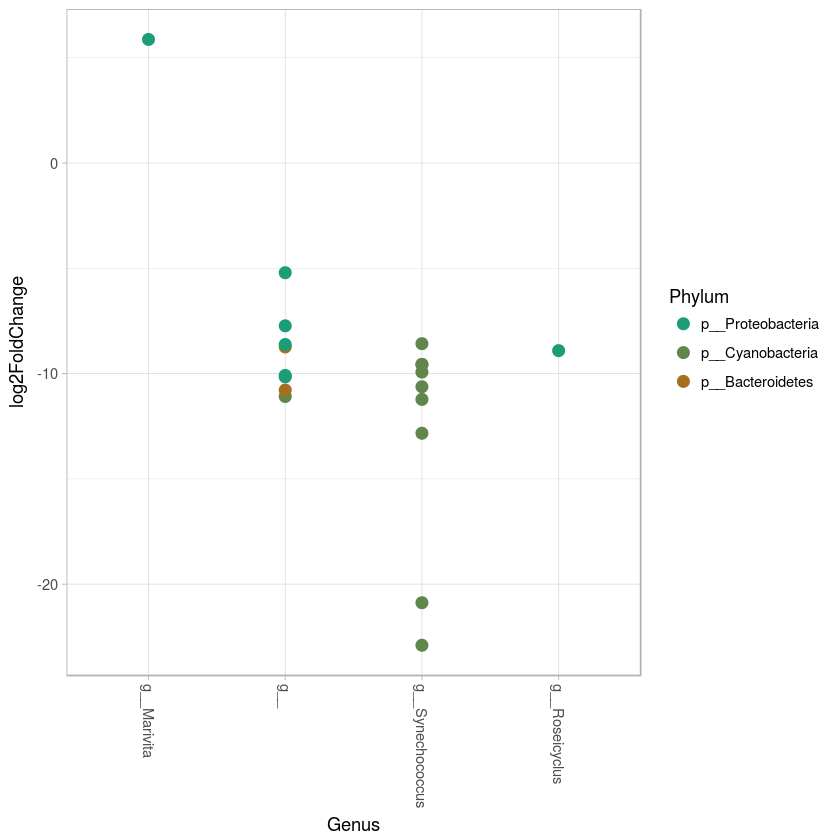

In [11]:
sample_data(camaron_lightseveresig)$light = factor (get_variable(camaron_lightseveresig, "estado") %in% c("Yucatán"))
obj1deseq = phyloseq_to_deseq2(camaron_lightseveresig, ~estado)

obj9 = obj1deseq
gm_mean = function(x, na.rm=TRUE){  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))}
geoMeans = apply(counts(obj9), 1, gm_mean)

obj9 = estimateSizeFactors(obj9, geoMeans = geoMeans)
obj9 = DESeq(obj9, fitType="local")
res = results(obj9, cooksCutoff = FALSE)
alpha = 0.01
sigtab9 = res[which(res$padj < alpha), ]
sigtab9 = cbind(as(sigtab9, "data.frame"), as(tax_table(camaron_lightseveresig)[rownames(sigtab9), ], "matrix"))
# Phylum order
x = tapply(sigtab9$log2FoldChange, sigtab9$Phylum, function(x) max(x))
x = sort(x, TRUE)
sigtab9$Phylum = factor(as.character(sigtab9$Phylum), levels=names(x))
# Genus order
x = tapply(sigtab9$log2FoldChange, sigtab9$Genus, function(x) max(x))
x = sort(x, TRUE)
sigtab9$Genus = factor(as.character(sigtab9$Genus), levels=names(x))
    
ggplot(sigtab9, aes(x=Genus, y=log2FoldChange, color=Phylum)) + scale_color_manual(values=colorRampPalette(brewer.pal(8,"Dark2"))(20))+geom_point(size=3)+theme_light() +theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
sigtab9

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 652 taxa and 188 samples ]
sample_data() Sample Data:       [ 188 samples by 12 sample variables ]
tax_table()   Taxonomy Table:    [ 652 taxa by 7 taxonomic ranks ]

[1] "Nayarit" "Sinaloa" "Sonora"  "Yucatán"

[1] TRUE

[1] "Nayarit" "Sinaloa" "Sonora"  "Yucatán"

[1] TRUE

id    estado health   year     health.1 temperature pH oxygen salinity
Nayarit  19.5 1      2.526316 1.210526 2.526316 NA          NA NA     NA      
Sinaloa  77.5 2      2.512821 1.243590 2.512821 NA          NA NA     NA      
Sonora  150.5 3      2.132353 1.132353 2.132353 NA          NA NA     NA      
Yucatán 186.5 4      1.500000 2.000000 1.500000 NA          NA NA     NA      
        chlorophyll latitude longitude
Nayarit NA          NA       NA       
Sinaloa NA          NA       NA       
Sonora  NA          NA       NA       
Yucatán NA          NA       NA

Nayarit Sinaloa Sonora Yucatán
5     43     118     34    20    
8  14897   23440    371     0    
17  7263   12197   2958   273    
18   290    1878   1279     1    
19    38     136     71     5    
20     5      15      6     4

Kingdom     Phylum           Class                    Order              
5  k__Bacteria p__Bacteroidetes c__[Saprospirae]         o__[Saprospirales] 
8  k__Bacteria p__Cyanobacteria c__Synechococcophycideae o__Synechococcales 
17 k__Bacteria p__Cyanobacteria c__Synechococcophycideae o__Synechococcales 
18 k__Bacteria p__Cyanobacteria c__Synechococcophycideae o__Synechococcales 
19 k__Bacteria p__Bacteroidetes c__[Rhodothermi]         o__[Rhodothermales]
20 k__Bacteria p__Bacteroidetes c__[Saprospirae]         o__[Saprospirales] 
   Family              Genus            Species
5  f__Saprospiraceae   g__              s__    
8  f__Synechococcaceae g__Synechococcus s__    
17 f__Synechococcaceae g__Synechococcus s__    
18 f__Synechococcaceae g__Synechococcus s__    
19 f__[Balneolaceae]   g__KSA1          s__    
20 f__Saprospiraceae   g__              s__

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9742 taxa and 4 samples ]
sample_data() Sample Data:       [ 4 samples by 12 sample variables ]
tax_table()   Taxonomy Table:    [ 9742 taxa by 7 taxonomic ranks ]

Warning message in metaMDS(veganifyOTU(physeq), distance, ...):
“stress is (nearly) zero: you may have insufficient data”Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”Warning message:
“Transformation introduced infinite values in discrete y-axis”

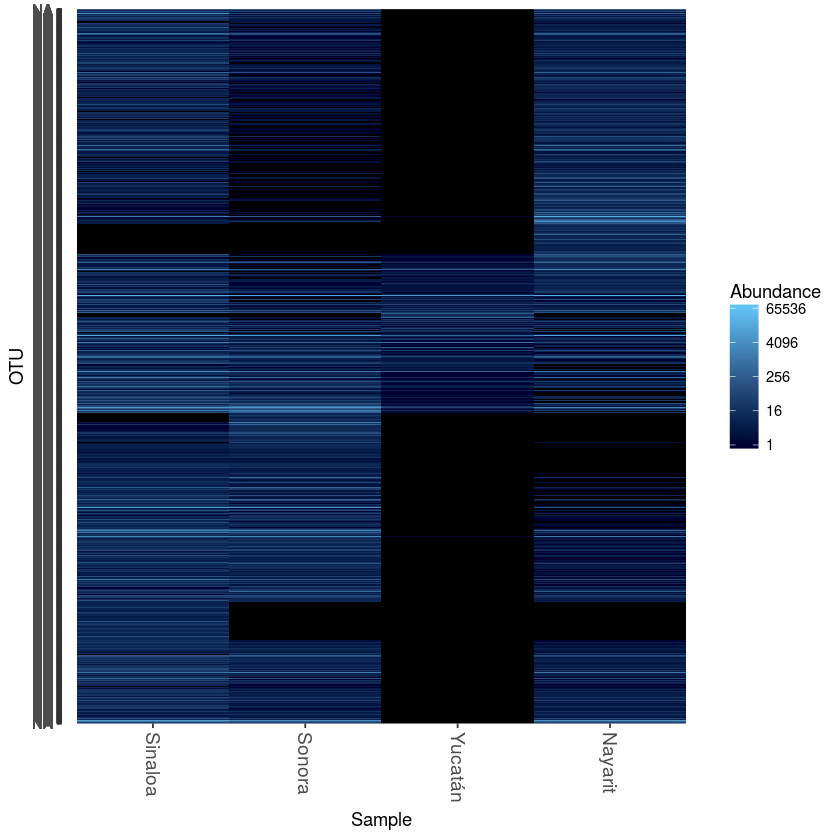

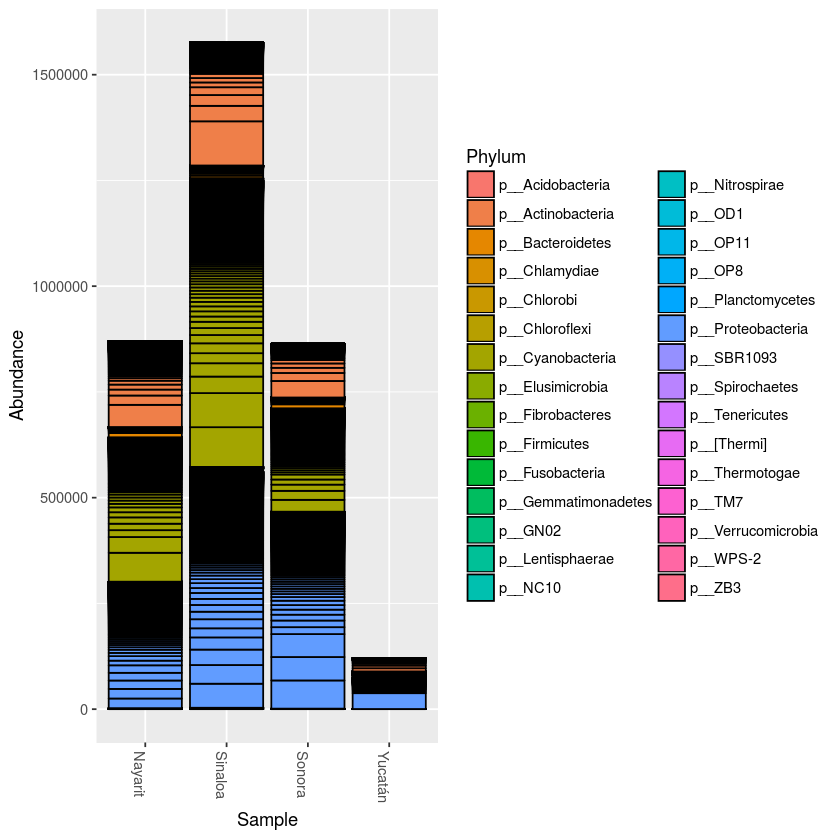

In [18]:
#hacer un heatmap solo con los OTUs significativamente aumentados...
physeq.subset <- subset_taxa(camaron, rownames(tax_table(camaron)) %in% c("100", "10051", "10151", "101698", "10180", "101985", "101996", "101997", "102", "10204", "10224", "102405", "10270", "102832", "10313", "103288", "103341", "103640", "10389", "10413", "10468", "105", "10520", "10544", "10564", "10593", "10613", "10633", "10642", "10655", "1067", "106844", "106962", "108177", "10839", "10917", "109314", "10979", "110880", "110904", "11120", "111249", "11220", "11352", "11416", "11457", "1149", "11863", "11894", "12068", "12142", "12176", "12241", "12538", "12553", "12565", "12601", "1263", "12662", "12677", "12719", "12737", "12758", "13031", "13335", "1356", "13658", "13759", "13768", "13776", "1381", "1383", "13887", "13994", "14117", "14156", "1441", "1454", "14642", "1495", "150988", "154018", "1570", "158409", "15880", "16087", "164976", "164999", "165065", "165083", "165206", "165236", "165275", "165422", "165433", "165520", "165628", "165751", "165834", "166048", "166314", "166406", "166699", "166843", "167168", "167379", "167418", "167424", "167425", "167606", "167667", "167698", "167764", "168560", "168870", "168994", "169309", "169480", "169504", "169621", "169775", "17", "170053", "170511", "170632", "170911", "170924", "171153", "171483", "171562", "172083", "17296", "180", "1852", "187761", "188839", "188876", "188891", "188902", "188910", "188936", "189085", "189091", "189114", "189297", "189326", "189342", "189348", "1899", "19", "190381", "190507", "190787", "190827", "190845", "191342", "191457", "191825", "192017", "192333", "192336", "192793", "192806", "193130", "193807", "19485", "194894", "195888", "196038", "19630", "1966", "1977", "198654", "1991", "199760", "199802", "200022", "20055", "20066", "201049", "201111", "201163", "201205", "201539", "201717", "201815", "202122", "203109", "204892", "204960", "207", "208", "20848", "210036", "210453", "210615", "210825", "212213", "212568", "21341", "21378", "21433", "21461", "21518", "215507", "21567", "21579", "21592", "21598", "21659", "216780", "21704", "21755", "21793", "218", "21845", "21848", "21892", "21920", "21951", "21960", "21990", "22014", "22076", "220848", "22088", "223905", "22698", "22704", "229840", "231", "231891", "231893", "231903", "231911", "231919", "231949", "231985", "23358", "233637", "234479", "238519", "238884", "239002", "239772", "240737", "242187", "245043", "2455", "248645", "250", "250887", "256", "257", "257800", "257901", "258", "263679", "268", "269", "273005", "274698", "275376", "2760", "277622", "277625", "278", "279060", "281", "281684", "2821", "2846", "285608", "286510", "287662", "289945", "290", "2938", "2958", "296", "300171", "301777", "3064", "3069", "314760", "3150", "3161", "3162", "3170", "31715", "3195", "3263", "3302", "3342", "3357", "3360", "3362", "338", "3398", "34099", "342135", "3446", "3454", "346980", "347123", "347524", "347583", "347900", "3494", "349463", "349772", "3499", "350343", "350608", "351335", "3522", "352370", "352703", "353186", "353548", "3543", "354543", "3556", "355683", "356608", "357292", "360859", "361443", "3624", "363094", "363244", "3637", "364887", "364976", "365407", "366278", "3667", "366958", "367011", "367058", "3677", "367843", "3717", "374", "3740", "3747", "37488", "37660", "37744", "3775", "37779", "37803", "37807", "3787", "37891", "3804", "38065", "38096", "38123", "38152", "38182", "3819", "38519", "38554", "38584", "38588", "386", "3860", "3865", "38652", "38680", "38711", "38757", "38778", "38830", "3884", "38860", "38875", "38876", "38923", "38970", "38978", "39342", "39383", "39526", "39733", "4018", "40349", "40382", "40425", "41008", "41175", "41729", "41737", "41756", "41832", "41895", "41984", "42154", "42167", "4229", "42628", "42769", "42973", "43037", "43970", "44106", "44118", "44127", "44150", "44176", "44197", "44223", "44263", "44288", "44423", "45463", "45619", "45636", "45705", "45713", "45716", "45830", "4587", "46030", "46164", "462339", "46305", "465732", "466277", "466448", "466739", "467545", "467690", "468035", "468259", "468565", "469338", "47018", "471427", "471917", "472428", "47244", "47249", "47286", "473542", "473612", "473712", "475603", "47589", "476161", "476206", "47663", "4770", "477361", "478314", "479014", "480335", "480432", "4817", "482874", "50425", "50439", "504712", "50542", "50577", "50583", "50586", "50601", "50623", "50628", "50653", "50681", "507015", "50704", "50719", "50807", "50808", "508324", "50878", "50906", "509759", "50991", "510273", "510373", "510411", "510424", "51046", "51078", "511643", "51167", "511708", "511717", "511919", "512518", "51258", "51276", "513202", "513224", "513295", "513631", "514264", "514457", "514581", "51517", "515230", "51539", "515755", "515884", "515885", "515887", "515896", "515946", "51604", "516069", "51638", "51649", "51662", "51739", "51834", "518581", "518989", "519278", "519280", "519329", "519378", "51960", "51980", "52067", "52068", "52099", "521145", "52242", "522448", "522620", "5227", "52288", "52289", "52582", "52762", "53060", "53124", "53141", "5316", "5327", "53479", "535775", "5358", "536495", "536851", "537678", "538271", "540460", "540821", "540959", "541282", "541462", "541497", "541681", "542942", "544406", "548928", "54934", "551009", "55510", "555514", "557766", "55834", "55895", "55904", "55962", "55973", "56011", "56039", "56082", "561287", "56269", "56572", "56615", "567426", "56966", "57", "57167", "57446", "5745", "575", "57629", "57716", "58613", "5881", "591", "59197", "59460", "59619", "60130", "60635", "60744", "60753", "61071", "61974", "62171", "63661", "6380", "648147", "648403", "64988", "654504", "65842", "659261", "67603", "6766", "6910", "69902", "701", "713", "7239", "724", "72406", "7256", "7340", "76435", "76564", "773789", "779991", "8", "81698", "8205", "824337", "824340", "834", "84768", "87", "880136", "885", "890", "896", "9144", "925", "9401", "94146", "944", "9468", "9508", "953", "9543", "9617", "962", "9640", "9805", "9812", "9831", "9851"))
physeq.subset
mergeph1 = merge_samples(physeq.subset, "estado")
mergeph2 = merge_samples(sample_data(physeq.subset), "estado")
sample_names(mergeph1)
identical(mergeph2, sample_data(mergeph1))
#mergeph1
#p <- plot_heatmap(mergeph1, taxa.label="Genus")
#p
mergeph1 = merge_samples(camaron2, "estado")
mergeph2 = merge_samples(sample_data(camaron2), "estado")
sample_names(mergeph1)
identical(mergeph2, sample_data(mergeph1))

#p <- plot_heatmap(mergeph1, taxa.label="Genus")
#p

write.table(t(otu_table(mergeph1)), "tmp")
write.table((tax_table(mergeph1)), "tmp2")

mergeotu <- t(otu_table(mergeph1))
mergetax <- tax_table(mergeph1)

mergedata <- sample_data(mergeph1)

mergedata
head(mergeotu)
head(mergetax)

newmerge <- phyloseq(mergeotu, mergetax, mergedata)
newmerge

plot_heatmap(newmerge, taxa.label="Family")
plot_bar(newmerge, fill="Phylum")

Warning message in metaMDS(veganifyOTU(physeq), distance, ...):
“stress is (nearly) zero: you may have insufficient data”Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”Warning message:
“Transformation introduced infinite values in discrete y-axis”

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9742 taxa and 4 samples ]
tax_table()   Taxonomy Table:    [ 9742 taxa by 7 taxonomic ranks ]

Warning message in metaMDS(veganifyOTU(physeq), distance, ...):
“stress is (nearly) zero: you may have insufficient data”Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Warning message:
“Transformation introduced infinite values in discrete y-axis”

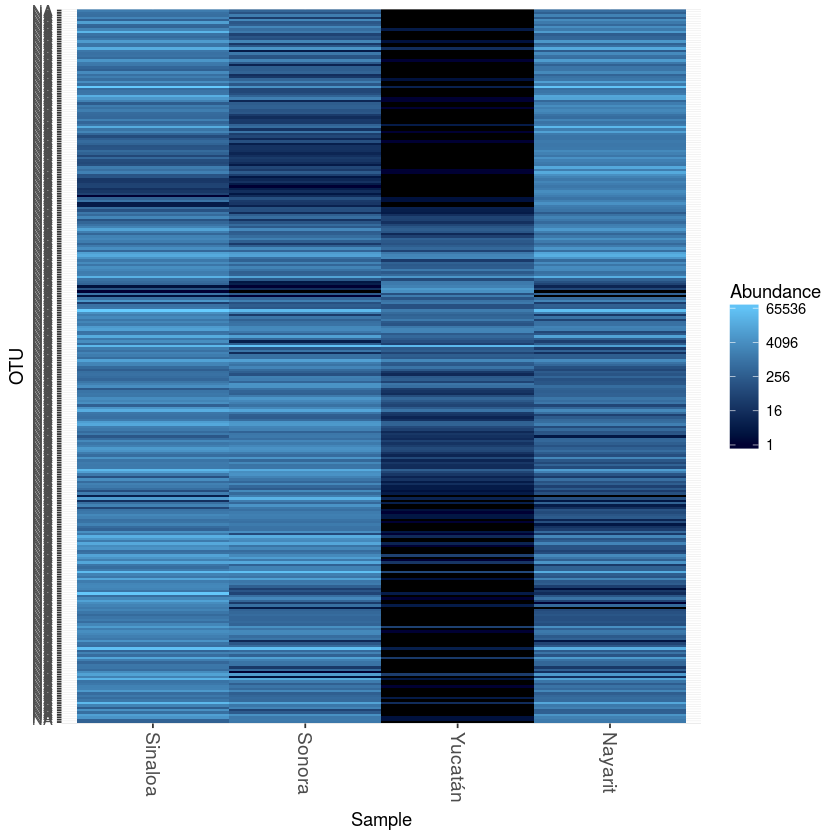

Warning message:
“Transformation introduced infinite values in discrete y-axis”Warning message in metaMDS(veganifyOTU(physeq), distance, ...):
“stress is (nearly) zero: you may have insufficient data”Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Warning message:
“Transformation introduced infinite values in discrete y-axis”

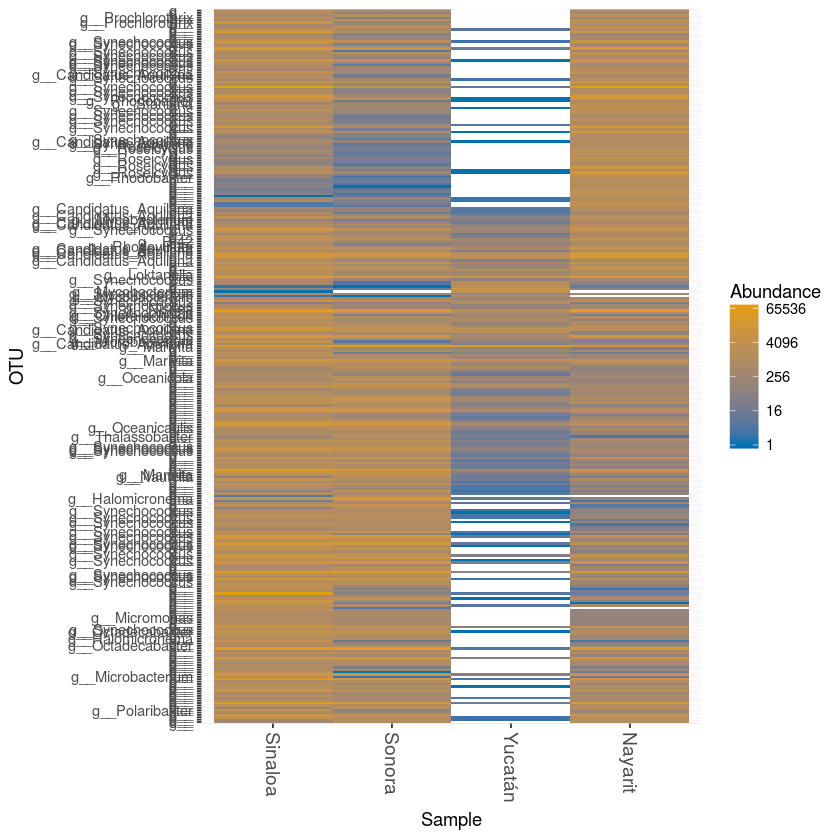

Warning message:
“Transformation introduced infinite values in discrete y-axis”Warning message in metaMDS(veganifyOTU(physeq), distance, ...):
“stress is (nearly) zero: you may have insufficient data”Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Warning message:
“Transformation introduced infinite values in discrete y-axis”

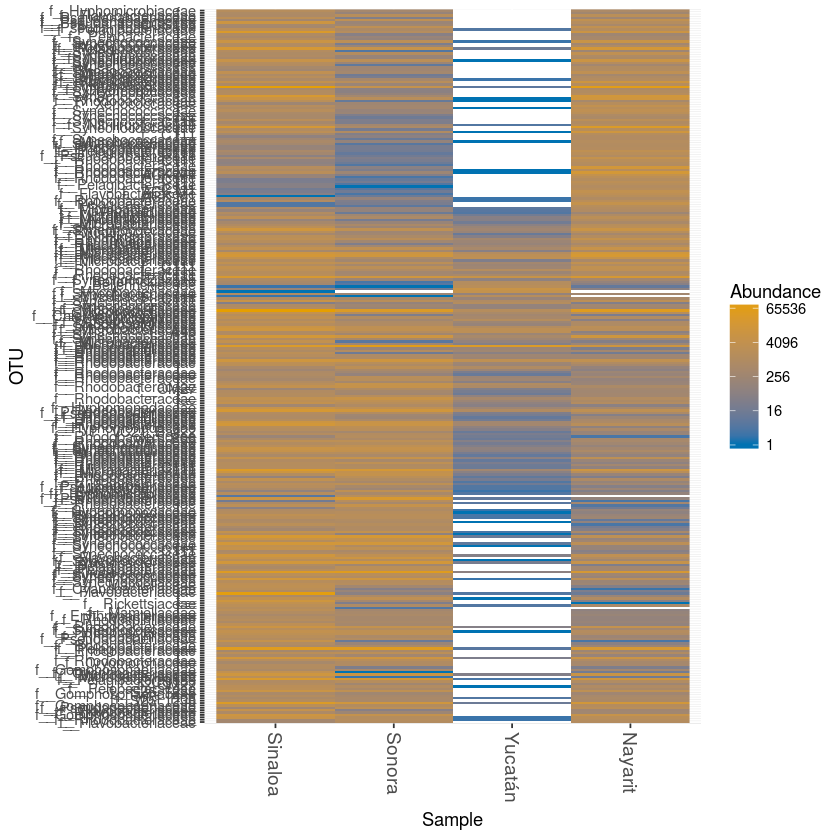

Warning message:
“Transformation introduced infinite values in discrete y-axis”Warning message in metaMDS(veganifyOTU(physeq), distance, ...):
“stress is (nearly) zero: you may have insufficient data”Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Warning message:
“Transformation introduced infinite values in discrete y-axis”

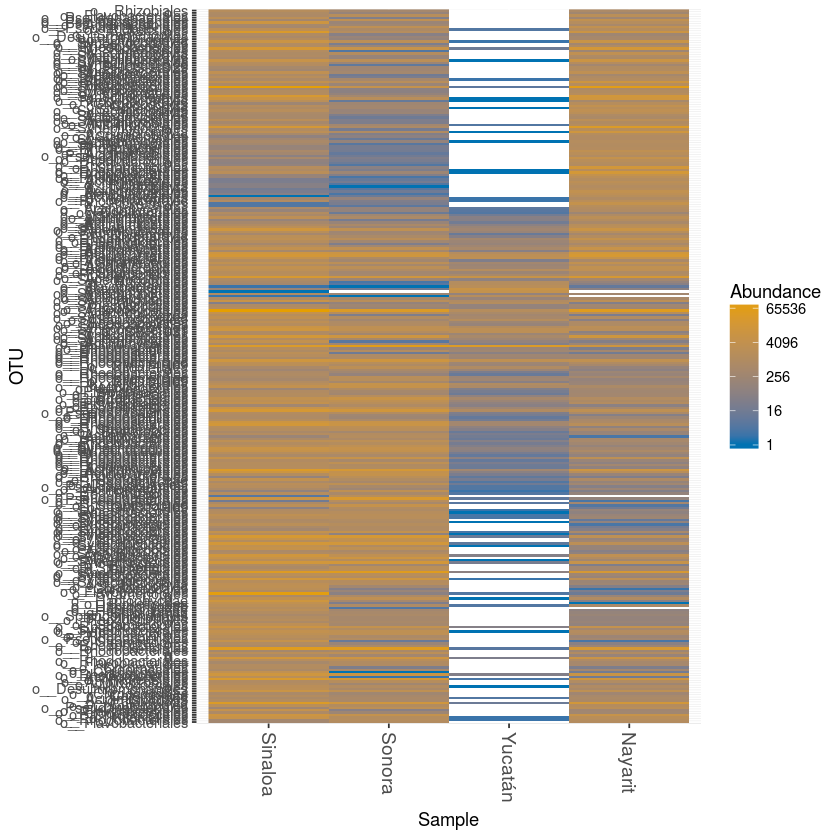

Warning message:
“Transformation introduced infinite values in discrete y-axis”

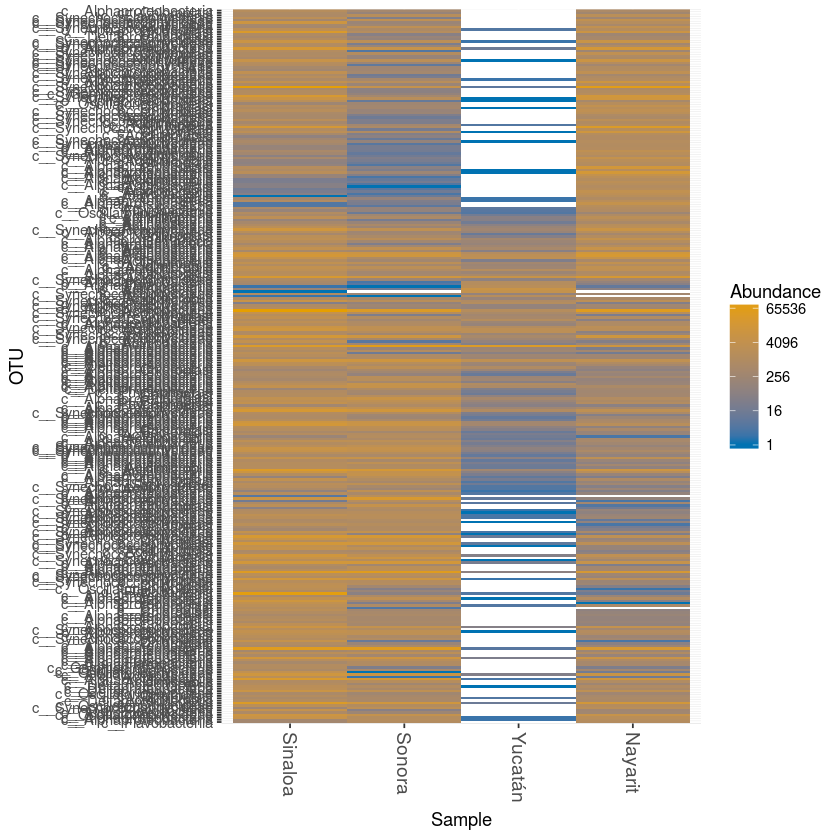

In [79]:
library(ggplot2)
library(vegan)
library(phyloseq)

otu <- as.matrix(read.table("tmp", header=T, row.names=1)) #tabla de OTUs sin singletons, formato tabular.  eliminados con: http://qiime.org/scripts/filter_otus_from_otu_table.html
OTU = otu_table(otu, taxa_are_rows=T)
taximat = as.matrix(read.table("tmp2", header=T, row.names=1)) #revisar los encabezados
taxi=tax_table(taximat)
camaron_subset = phyloseq(OTU, taxi)

gpt <- camaron_subset
gpt <- prune_taxa(names(sort(taxa_sums(camaron_subset),TRUE)[1:300]),gpt) #aquí se puede filtrar para los 100 màs abundantes o los que quieran. 

#ggsave ("heatmap100.pdf", width=60, height=60, units="cm")
 plot_heatmap(gpt)

camaron_subset
##corrección para cuando aparecen NAs en la taxonomía
ylabvec = as(tax_table(gpt)[,"Genus"], "character")
names(ylabvec) <- taxa_names(gpt)
ylabvec[is.na(ylabvec)] <- ""
##remover NAs del vector
p <- plot_heatmap(gpt, low="#0072B2", high="#E69F00",na.value="white") + scale_y_discrete(labels=ylabvec)
p
# p <- plot_heatmap(camaron_subset)
# p + scale_y_discrete(labels=ylabvec)
ggsave ("heatmap_Sig_core_GENUS_camaron.pdf", width=30, height=120, units="cm", limitsize=FALSE)


gpt <- camaron_subset
gpt <- prune_taxa(names(sort(taxa_sums(camaron_subset),TRUE)[1:300]),gpt)

ylabvec = as(tax_table(gpt)[,"Family"], "character")
names(ylabvec) <- taxa_names(gpt)
ylabvec[is.na(ylabvec)] <- ""
##remover NAs del vector
p <- plot_heatmap(gpt, low="#0072B2", high="#E69F00",na.value="white") + scale_y_discrete(labels=ylabvec)
p
# p <- plot_heatmap(camaron_subset)
# p + scale_y_discrete(labels=ylabvec)
ggsave ("heatmap_Sig_core_FAMILY_camaron.pdf", width=30, height=120, units="cm", limitsize=FALSE)

gpt <- camaron_subset
gpt <- prune_taxa(names(sort(taxa_sums(camaron_subset),TRUE)[1:300]),gpt)
ylabvec = as(tax_table(gpt)[,"Order"], "character")
names(ylabvec) <- taxa_names(gpt)
ylabvec[is.na(ylabvec)] <- ""
##remover NAs del vector
p <- plot_heatmap(gpt, low="#0072B2", high="#E69F00",na.value="white") + scale_y_discrete(labels=ylabvec)
p
# p <- plot_heatmap(camaron_subset)
# p + scale_y_discrete(labels=ylabvec)
ggsave ("heatmap_Sig_core_ORDER_camaron.pdf", width=30, height=120, units="cm", limitsize=FALSE)

gpt <- camaron_subset
gpt <- prune_taxa(names(sort(taxa_sums(camaron_subset),TRUE)[1:300]),gpt)
ylabvec = as(tax_table(gpt)[,"Class"], "character")
names(ylabvec) <- taxa_names(gpt)
ylabvec[is.na(ylabvec)] <- ""
##remover NAs del vector
p <- plot_heatmap(gpt, low="#0072B2", high="#E69F00",na.value="white") + scale_y_discrete(labels=ylabvec)
p
# p <- plot_heatmap(camaron_subset)
# p + scale_y_discrete(labels=ylabvec)
ggsave ("heatmap_Sig_core_CLASS_camaron.pdf", width=30, height=120, units="cm", limitsize=FALSE)

#Diagramas de Venn

In [21]:
#para hacer el càlculo se obtienen las listas de OTUs por cada condición a comparar, luego usamos http://bioinformatics.psb.ugent.be/cgi-bin/liste/Venn/calculate_venn.htpl para armar los diagramas de Venn y las listas resultantes. 
df <-read.table("tmp", header=T, row.names = 1)
k <- which(df>=1, arr.ind=TRUE)
df[k] <- rownames(k)

write.table(df,"Venn_input.txt")
for (ci in 1:ncol(df)) {
    write.csv(df[,ci], paste("col", ci, ".tsv", sep = ""))
}



#write.table(t(otu_table(mergeph1)), "tmp_venn")

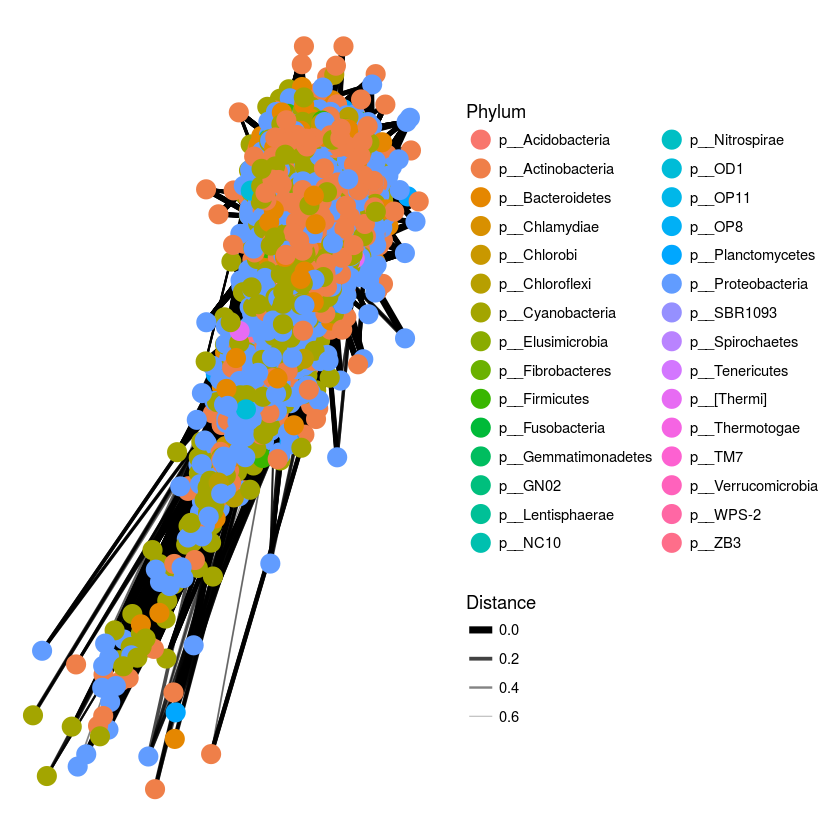

In [87]:
plot_net(camaron_subset, color="Phylum", type="taxa")
ggsave ("network_estados.pdf", width=60, height=60, units="cm")

Loading required package: permute
Loading required package: lattice
This is vegan 2.5-2


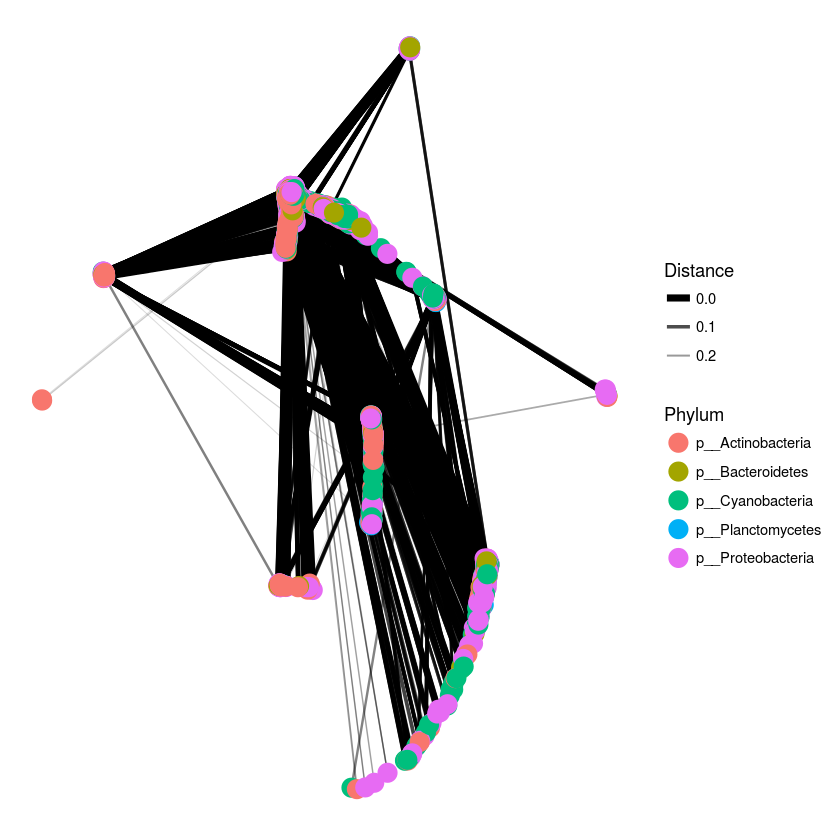

In [3]:
library(ggplot2)
library(vegan)
library(phyloseq)

otu <- as.matrix(read.table("tmp", header=T, row.names=1)) #tabla de OTUs sin singletons, formato tabular.  eliminados con: http://qiime.org/scripts/filter_otus_from_otu_table.html
OTU = otu_table(otu, taxa_are_rows=T)
taximat = as.matrix(read.table("tmp2", header=T, row.names=1)) #revisar los encabezados
taxi=tax_table(taximat)
camaron_subset = phyloseq(OTU, taxi)

phylum.sum = tapply(taxa_sums(camaron_subset), tax_table(camaron_subset)[, "Phylum"], sum, na.rm=TRUE)
top5phyla = names(sort(phylum.sum, TRUE))[1:5]
GP1 = prune_taxa((tax_table(camaron_subset)[, "Phylum"] %in% top5phyla), camaron_subset)


p <- plot_net(GP1, color="Phylum", type="taxa", maxdist = 0.3, laymeth ="auto")
p
ggsave ("network_estados_auto.pdf", width=60, height=60, units="cm")


In [4]:
write.table(p$data, "network_edos_colapasados.txt")
edge_attr(p$data)

ERROR: Error in edge_attr(p$data): could not find function "edge_attr"


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1075 taxa and 188 samples ]
sample_data() Sample Data:       [ 188 samples by 12 sample variables ]
tax_table()   Taxonomy Table:    [ 1075 taxa by 7 taxonomic ranks ]

[1] "Nayarit" "Sinaloa" "Sonora"  "Yucatán"

[1] TRUE

[1] "Nayarit" "Sinaloa" "Sonora"  "Yucatán"

[1] TRUE

id    estado health   year     health.1 temperature pH oxygen salinity
Nayarit  19.5 1      2.526316 1.210526 2.526316 NA          NA NA     NA      
Sinaloa  77.5 2      2.512821 1.243590 2.512821 NA          NA NA     NA      
Sonora  150.5 3      2.132353 1.132353 2.132353 NA          NA NA     NA      
Yucatán 186.5 4      1.500000 2.000000 1.500000 NA          NA NA     NA      
        chlorophyll latitude longitude
Nayarit NA          NA       NA       
Sinaloa NA          NA       NA       
Sonora  NA          NA       NA       
Yucatán NA          NA       NA

Nayarit Sinaloa Sonora Yucatán
5     43     118     34    20    
8  14897   23440    371     0    
17  7263   12197   2958   273    
18   290    1878   1279     1    
19    38     136     71     5    
20     5      15      6     4

Kingdom     Phylum           Class                    Order              
5  k__Bacteria p__Bacteroidetes c__[Saprospirae]         o__[Saprospirales] 
8  k__Bacteria p__Cyanobacteria c__Synechococcophycideae o__Synechococcales 
17 k__Bacteria p__Cyanobacteria c__Synechococcophycideae o__Synechococcales 
18 k__Bacteria p__Cyanobacteria c__Synechococcophycideae o__Synechococcales 
19 k__Bacteria p__Bacteroidetes c__[Rhodothermi]         o__[Rhodothermales]
20 k__Bacteria p__Bacteroidetes c__[Saprospirae]         o__[Saprospirales] 
   Family              Genus            Species
5  f__Saprospiraceae   g__              s__    
8  f__Synechococcaceae g__Synechococcus s__    
17 f__Synechococcaceae g__Synechococcus s__    
18 f__Synechococcaceae g__Synechococcus s__    
19 f__[Balneolaceae]   g__KSA1          s__    
20 f__Saprospiraceae   g__              s__

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9742 taxa and 4 samples ]
sample_data() Sample Data:       [ 4 samples by 12 sample variables ]
tax_table()   Taxonomy Table:    [ 9742 taxa by 7 taxonomic ranks ]

Warning message in metaMDS(veganifyOTU(physeq), distance, ...):
“stress is (nearly) zero: you may have insufficient data”Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”Warning message:
“Transformation introduced infinite values in discrete y-axis”

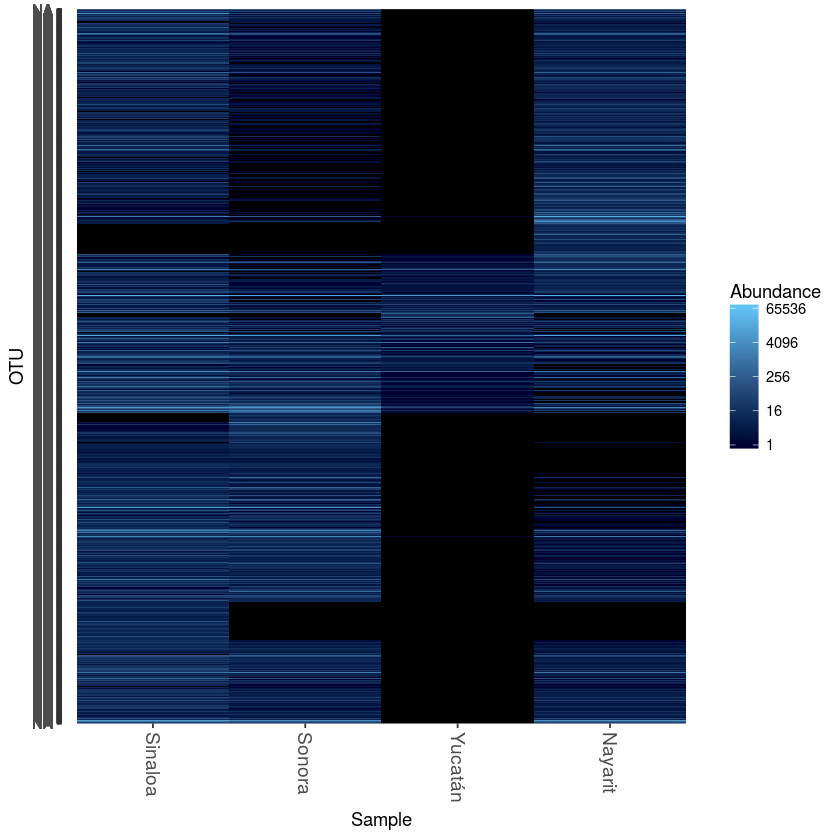

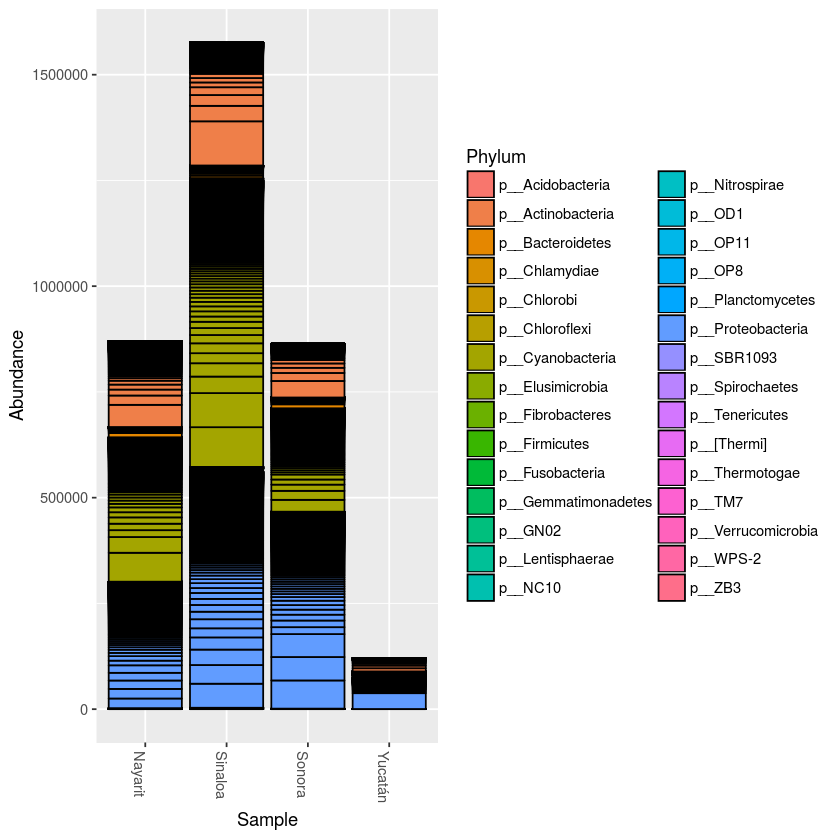

In [28]:
library(phyloseq)
#hacer un heatmap solo con los OTUs core...
#physeq.subset <- subset_taxa(camaron, rownames(tax_table(camaron)) %in% c(#hacer un heatmap solo con los OTUs significativamente aumentados...
physeq.subset <- subset_taxa(camaron, rownames(tax_table(camaron)) %in% c("232338", "1387", "1932", "351447", "29", "38711", "471917", "12242", "36711", "18931", "231954", "6375", "55947", "51322", "39", "189778", "546464", "38643", "1", "581", "877768", "167437", "57447", "283399", "574556", "349851", "189789", "51142", "57332", "16887", "21525", "514844", "5745", "543387", "23247", "232", "6744", "254985", "12692", "349495", "1988", "5981", "521678", "233294", "1313", "57372", "191979", "1112", "56751", "57963", "654585", "3648", "56455", "543284", "349772", "46666", "165726", "5117", "653128", "46827", "545184", "541669", "259226", "18898", "326", "2543", "5129", "191998", "188619", "4742", "51293", "5548", "21792", "512464", "165717", "24891", "928", "59785", "792243", "1655", "3747", "82724", "346955", "56572", "3192", "87691", "54131", "5299", "3775", "9887", "545742", "468875", "51513", "19281", "5152", "47337", "336", "355341", "479337", "243795", "472483", "3637", "365", "13335", "511413", "541116", "54542", "5976", "513424", "46587", "59651", "13994", "124", "57167", "6875", "349321", "2259", "52554", "34698", "3162", "16939", "545211", "51471", "249332", "17632", "522448", "54949", "51539", "557766", "253134", "347233", "57616", "232695", "477897", "51899", "12364", "691", "9847", "5245", "3171", "44122", "4499", "59827", "514544", "189138", "54811", "541197", "288559", "473542", "5164", "24156", "11996", "473612", "24751", "277147", "552187", "518792", "42769", "34755", "239263", "19874", "19589", "565", "54553", "24345", "51669", "353548", "26958", "44993", "35374", "463315", "131", "543975", "649491", "329813", "44329", "54524", "3582", "467655", "466176", "1121", "896", "545629", "16856", "2768", "38778", "18", "5826", "3373", "46639", "515884", "539722", "111249", "559939", "613", "5141", "242817", "541354", "179", "12525", "16766", "3948", "51273", "38963", "3917", "44263", "52168", "18924", "258", "9485", "54537", "52242", "6171", "21848", "7239", "542764", "347583", "59759", "5148", "824357", "356884", "58943", "44612", "22122", "26371", "234", "775574", "3955", "267298", "5227", "64226", "1356", "465732", "547934", "347527", "552811", "54831", "238793", "364976", "2174", "824652", "1977", "1285", "216769", "3757", "41729", "342479", "5466", "166314", "33", "5654", "189114", "548792", "549", "513437", "35715", "11631", "541131", "544759", "358335", "47277", "591", "648517", "552982", "252885", "656651", "163", "542834", "111315", "51373", "542434", "47286", "5562", "77238", "38144", "47249", "215523", "819", "55949", "2578", "4781", "536495", "37526", "55189", "5736", "541728", "511767", "545233", "355669", "61916", "1636", "38935", "338", "515468", "1223", "862761", "3263", "1188", "54936", "4631", "16625", "51268", "547145", "41832", "522949", "19673", "52127", "24248", "58344", "297", "21341", "77219", "52923", "541396", "31476", "12662", "5594", "514723", "57362", "55656", "23231", "546942", "27869", "878467", "238872", "4817", "5837", "55823", "521319", "21755", "9768", "9381", "343184", "19638", "878387", "573965", "76325", "46573", "482874", "53621", "513295", "51212", "61974", "478589", "347138", "651991", "9812", "264165", "12446", "751", "824623", "53151", "462339", "552517", "35488", "56966", "256", "466277", "248195", "648188", "1413", "41984", "11668", "544224", "4575", "239368", "25432", "5143", "167425", "38584", "374", "1962", "42167", "12292", "169621", "648814", "246675", "519579", "512119", "7755", "542789", "58419", "57186", "468461", "259341", "47685", "2399", "574436", "19679", "51424", "42154", "357894", "59886", "511482", "19195", "261", "467762", "12156", "29225", "61784", "51972", "35237", "46576", "551233", "15151", "351335", "482253", "54291", "14156", "54875", "356356", "8843", "52648", "35273", "519263", "5849", "16538", "153853", "46662", "86277", "512", "541497", "463", "23233", "54796", "11698", "555573", "12777", "468444", "19249", "468687", "347752", "2414", "4423", "64854", "2114", "12839", "55479", "2958", "573168", "2146", "5544", "468417", "47188", "44439", "467715", "65338", "5358", "5621", "169459", "54169", "2316", "346952", "3884", "27511", "465844", "511643", "192333", "1331", "88263", "781778", "517452", "18894", "516341", "477", "44118", "59639", "539645", "58523", "541852", "55315", "387", "257", "21557", "35974", "3479", "5494", "123147", "5274", "188942", "61659", "5", "1957", "17297", "512518", "15988", "299", "52384", "8276", "25", "13887", "253764", "46", "56596", "512751", "554723", "1642", "465778", "553737", "1833", "13776", "36758", "51441", "35296", "5125", "289", "18912", "34743", "349821", "1291", "23361", "59341", "1668", "13412", "465736", "2179", "15234", "561287", "476161", "51252", "19217", "55834", "13", "24543", "39223", "188928", "166322", "465181", "168994", "5611", "358785", "16539", "349728", "3494", "36723", "473986", "188848", "165163", "232362", "256272", "511167", "21567", "23854", "763587", "5766", "51643", "54429", "248877", "558445", "239137", "89964", "534857", "57934", "366934", "43915", "59917", "191236", "469855", "511717", "51928", "31777", "64481", "51519", "471525", "51917", "648277", "188958", "19976", "23629", "52587", "4768", "473293", "468388", "558851", "54862", "774238", "543132", "774347", "552299", "42554", "351994", "555567", "18977", "5983", "422", "77899", "165236", "56157", "482364", "1468", "511696", "347695", "1593", "571613", "12176", "543564", "325975", "4425", "55699", "23769", "47641", "167168", "3195", "545113", "51475", "54517", "4532", "54445", "38554", "55456", "364887", "1544", "396", "165358", "35497", "543222", "5618", "546368", "515983", "188987", "511913", "511353", "34725", "5623", "467453", "25686", "166679", "4813", "5198", "65259", "59666", "16948", "218", "38875", "51995", "22323", "21678", "12329", "1381", "37891", "367216", "12719", "784816", "57117", "189", "46631", "221", "19413", "544624", "38561", "482279", "51117", "541171", "7424", "46594", "517354", "5271", "2199", "59945", "6585", "468259", "192465", "24737", "51244", "3499", "3838", "2192", "5972", "51962", "546669", "513367", "465991", "212213", "58278", "53993", "23635", "542854", "543759", "59731", "514457", "547685", "1128", "54821", "5586", "648295", "59779", "57771", "516927", "18914", "11894", "826277", "3558", "349972", "349411", "17242", "194936", "3342", "3425", "233621", "985", "8248", "47563", "21642", "524", "55498", "55121", "5882", "55984", "165422", "544", "269", "363", "511322", "19293", "36789", "233681", "513728", "55679", "251636", "59967", "1753", "523285", "545577", "21453", "59749", "2826", "21214", "541713", "958", "199676", "1226", "188944", "465855", "54663", "331", "544926", "34994", "59989", "5947", "216628", "541561", "19443", "648892", "35193", "53124", "5132", "54479", "1215", "553723", "465865", "3398", "9883", "543846", "88563", "1858", "193147", "194955", "14194", "19175", "542748", "19314", "41845", "543461", "188633", "13197", "39342", "242855", "57692", "57618", "775142", "649448", "34", "52142", "541316", "51231", "539435", "5833", "512172", "86857", "541776", "21845", "54115", "1923", "54144", "57235", "772126", "693", "824794", "54535", "511796", "187761", "59254", "1966", "5446", "3873", "54917", "59777", "6779", "1852", "5116", "571275", "4755", "51265", "357292", "55231", "546384", "3164", "59721", "59378", "4361", "311", "825", "38928", "2274", "52288", "9617", "16375", "191147", "51397", "514419", "638", "649553", "254876", "64988", "54935", "482174", "772162", "468729", "28568", "233425", "3787", "14376", "14795", "4416", "554792", "11146", "46572", "541414", "351925", "51498", "52911", "51276", "55746", "51457", "165931", "225", "14226", "782484", "5795", "23834", "281684", "278", "511927", "521125", "59889", "3963", "188916", "471452", "11518", "35797", "16591", "2665", "1269", "36285", "1165", "6471", "188971", "16641", "231893", "65869", "3513", "651182", "166578", "21814", "222", "543359", "52645", "5412", "165433", "774324", "21367", "482863", "1789", "545445", "54819", "3883", "541265", "54321", "17321", "354543", "19286", "552431", "55893", "2", "2125", "773146", "5644", "215531", "5864", "34887", "12782", "23579", "76783", "54925", "167424", "466379", "51687", "19", "51164", "57322", "12211", "42628", "5655", "4717", "16844", "554498", "513434", "2846", "139", "367837", "43926", "1246", "259929", "465759", "28194", "551358", "24621", "54982", "57662", "349482", "238519", "54927", "8881", "193971", "195888", "1258", "1342", "167479", "232626", "478314", "473434", "525", "56884", "193643", "5549", "4635", "17243", "9851", "56194", "54561", "352382", "541462", "5665", "21892", "522348", "517672", "465733", "515829", "51144", "481794", "36859", "18916", "57294", "544753", "13788", "38876", "46744", "466187", "5891", "2288", "534747", "274698", "58887", "5128", "47855", "515946", "24892", "216147", "275388", "549158", "212912", "514317", "477677", "54618", "5118", "542888", "545172", "34719", "191332", "13579", "777", "363383", "1891", "545245", "3798", "239565", "521145", "11676", "48335", "191318", "54857", "5248", "12241", "54824", "193569", "165727", "5192", "4846", "54415", "9499", "21378", "44316", "546199", "59321", "5914", "6589", "51211", "12538", "6364", "537127", "44245", "557823", "46826", "349977", "478412", "34814", "46574", "3362", "4249", "578", "18892", "9144", "54493", "25162", "351625", "513862", "55145", "953", "5991", "3696", "515333", "1349", "542942", "472283", "55452", "1372", "465731", "574981", "21594", "232169", "5492", "17", "242187", "2652", "2337", "478369", "241466", "1288", "522387", "5425", "14145", "22698", "55114", "5538", "5184", "547118", "2276", "547293", "59619", "941", "46779", "54212", "5414", "54446", "232442", "361443", "442", "542732", "45636", "522454", "249", "366862", "347846", "52221", "9787", "287333", "56447", "3334", "514581", "377", "11645", "515885", "5884", "214", "347876", "738", "1243", "51455", "22317", "36857", 
                                                                          "541124", "5731", "468565", "1474", "253685", "553897", "273223", "77851", "541548", "6811", "773362", "53282", "27745", "561", "47626", "5169", "51349", "534944", "188936", "466177", "355683", "156", "169661", "14643", "37488", "243157", "118", "772275", "216844", "5955", "5112", "51662", "169938", "49", "168546", "188929", "364", "23136", "58451", "59197", "12872", "54331", "44127", "56546", "52492", "28545", "245882", "37527", "296", "171", "51127", "582", "51193", "5555", "52951", "191678", "21793", "5653", "62171", "469623", "54141", "543148", "352", "547743", "3865", "56564", "512166", "513", "7246", "3543", "352361", "1176", "28", "468761", "478698", "3161", "238691", "286814", "54571", "55356", "166512", "23353", "46658", "13658", "541175", "231975", "5257", "35278", "53534", "172195", "513616", "1958", "21579", "512562", "827342", "191825", "23346", "21675", "36145", "51614", "51481", "51256", "5374", "543421", "18897", "1534", "514236", "471251", "355845", "5268", "34749", "347616", "5628", "5664", "44197", "16954", "466116", "23232", "39733", "2469", "51436", "5489", "35567", "188945", "577", "774464", "82434", "535167", "511594", "1444", "824337", "52262", "542235", "3717", "2196", "542213", "232559", "5122", "287662", "79185", "165142", "51175", "561273", "547723", "189297", "61327", "46886", "189348", "34736", "343435", "569", "18985", "46681", "514578", "21582", "515869", "51324", "294434", "24874", "2237", "347749", "57619", "136", "53323", "545236", "349463", "46317", "165751", "19811", "51517", "4889", "52733", "546733", "467942", "468229", "356822", "6766", "466356", "542742", "542841", "513375", "15423", "234666", "55898", "544999", "172365", "195314", "25844", "549184", "54711", "522986", "824518", "559348", "349811", "466365", "21776", "52124", "65842", "543431", "57456", "541447", "347669", "1282", "367883", "51955", "522441", "57924", "315", "541293", "12249", "55863", "198654", "54861", "349835", "317", "824929", "5816", "3896", "469173", "51523", "56374", "1493", "1613", "572825", "1721", "188876", "1225", "558166", "271", "42848", "1863", "23264", "1588", "84164", "169763", "1861", "188891", "349643", "43279", "542334", "469338", "22285", "5636", "51581", "51411", "3624", "54887", "48367", "5439", "367", "16987", "44176", "24281", "11352", "14769", "342", "59667", "38259", "192651", "199783", "62765", "42438", "478222", "773487", "515896", "54275", "367843", "512533", "39534", "52333", "386", "1261", "543252", "53683", "545943", "775376", "6699", "16648", "3378", "59633", "3933", "347291", "366958", "21593", "5458", "55885", "46595", "967", "12112", "52582", "233637", "472278", "551482", "2424", "58613", "56384", "1738", "194851", "1979", "512952", "511543", "18991", "5339", "355", "231941", "652678", "188965", "195", "21886", "5495", "1441", "194655", "57192", "234376", "51199", "59842", "22984", "188", "465888", "543394", "8531", "239772", "5835", "587", "269687", "232616", "18891", "233251", "362362", "544979", "19982", "268", "35376", "3677", "596", "1956", "9987", "37833", "51131", "465847", "713", "554425", "54151", "1679", "575737", "41756", "51258", "54368", "949", "59854", "5262", "9814", "5583", "27988", "54918", "192589", "3139", "24932", "535775", "23113", "465727", "54311", "51229", "465864", "5146", "253524", "56484", "52691", "773789", "3158", "46164", "3667", "193657", "11543", "13746", "58611", "47589", "999", "55155", "9831", "734", "373", "551383", "513224", "64231", "54835", "19313", "5753", "541542", "54475", "54394", "482145", "215877", "355771", "51492", "23272", "41916", "5942", "1149", "366278", "5559", "255", "18895", "5176", "23494", "349729", "19316", "648247", "546216", "28882", "28542", "34965", "542987", "16589", "56624", "59735", "5519", "21825", "12553", "534928", "542892", "266936", "253349", "21863", "824717", "46762", "4415", "59991", "28414", "4349", "57974", "5793", "56218", "6294", "216897", "53141", "122", "54587", "31151", "5834", "4725", "346982", "11395", "826631", "21831", "468764", "5712", "51698", "359321", "51534", "1495", "24184", "2756", "654175", "47387", "172495", "881424", "2646", "3469", "469579", "52219", "46586", "19467", "522587", "21447", "241744", "347248", "545863", "541434", "543335", "6882", "53187", "418", "522576", "46938", "51796", "167667", "3316", "54312", "1389", "1232", "16621", "77986", "11497", "31715", "477361", "13242", "46597", "2187", "547243", "16959", "277625", "54858", "54979", "347844", "2938", "17534", "38123", "16584", "24569", "369", "51167", "518545", "111511", "467881", "11416", "24977", "541567", "5673", "5461", "5881", "59959", "64887", "514285", "545698", "2445", "5714", "21616", "233687", "9169", "359794", "541453", "47", "5897", "54851", "51811", "44288", "52757", "774", "541365", "23339", "755", "535849", "51584", "231", "5926", "4583", "189192", "792", "189342", "515566", "61844", "6976", "12677", "165275", "6635", "3522", "2215", "5497", "68985", "47914", "466448", "3454", "35343", "467524", "19543"))
physeq.subset
mergeph1 = merge_samples(physeq.subset, "estado")
mergeph2 = merge_samples(sample_data(physeq.subset), "estado")
sample_names(mergeph1)
identical(mergeph2, sample_data(mergeph1))
#mergeph1
#p <- plot_heatmap(mergeph1, taxa.label="Genus")
#p
mergeph1 = merge_samples(camaron2, "estado")
mergeph2 = merge_samples(sample_data(camaron2), "estado")
sample_names(mergeph1)
identical(mergeph2, sample_data(mergeph1))

#p <- plot_heatmap(mergeph1, taxa.label="Genus")
#p

write.table(t(otu_table(mergeph1)), "tmp")
write.table((tax_table(mergeph1)), "tmp2")

mergeotu <- t(otu_table(mergeph1))
mergetax <- tax_table(mergeph1)

mergedata <- sample_data(mergeph1)

mergedata
head(mergeotu)
head(mergetax)

newmerge <- phyloseq(mergeotu, mergetax, mergedata)
newmerge

plot_heatmap(newmerge, taxa.label="Family")
plot_bar(newmerge, fill="Phylum")

In [5]:
##segundo intento de hacer redes con microbiomeseq
library(ggplot2)
library(vegan)
library(phyloseq)

otu <- as.matrix(read.table("tmp", header=T, row.names=1)) #tabla de OTUs sin singletons, formato tabular.  eliminados con: http://qiime.org/scripts/filter_otus_from_otu_table.html
OTU = otu_table(otu, taxa_are_rows=T)
taximat = as.matrix(read.table("tmp2", header=T, row.names=1)) #revisar los encabezados
taxi=tax_table(taximat)


library(microbiomeSeq)
library(igraph)
library(phyloseq)
#physeq <- taxa_level(t(camaron_subset), which_level="Genus")
#physeq
camaron_subset = phyloseq(OTU,taxi)
data= read.table("netmetadata.txt", header=T, row.names=1)
sampledata = sample_data(data.frame(estado=data$estado, row.names=sample_names(camaron_subset)))
camaron_subset = phyloseq(OTU, taxi, sampledata)
camaron_subset

physeq <- taxa_level(t(camaron_subset), which_level="Genus")
physeq

sample_data(physeq)
co_occr <- co_occurence_network(physeq, grouping_column = "estado",  
    method = "cor", select.condition = NULL, scale.vertex.size = 4, 
    scale.edge.width = 15, plotNetwork = F, plotBetweennessEeigenvalue = F)
require(visNetwork)

g <- co_occr$net$graph
data <- toVisNetworkData(g)
visNetwork(nodes = data$nodes, edges = data$edges, width = 900) %>% visOptions(highlightNearest = TRUE, 
    nodesIdSelection = TRUE)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9742 taxa and 4 samples ]
sample_data() Sample Data:       [ 4 samples by 1 sample variables ]
tax_table()   Taxonomy Table:    [ 9742 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 216 taxa and 4 samples ]
sample_data() Sample Data:       [ 4 samples by 1 sample variables ]

estado 
Nayarit Nayarit
Sinaloa Sinaloa
Sonora  Sonora 
Yucatán Yucatán

ERROR: Error in rep.default(trts[a], dim(temp)[2]): invalid 'times' argument
